<a href="https://colab.research.google.com/github/robsymowen/Project-Line/blob/main/AlexNette_Training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MOUNT DRIVE // NEXT CAN WE DO THE ZIP? w

In [ ]:
# mount google *drive*
from glob import glob
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# list contents
!ls "/content/drive/MyDrive/VISION_LABS/RobbieOwen"
# !ls /content/drive/MyDrive/visionlab/students

# for you the directory will be something like '/content/drive/MyDrive/Shared with me/datasets'
data_dir = "/content/drive/MyDrive/VISION_LABS/RobbieOwen/ProjectLine/AugmentedDataset"
# data_dir = '/content/drive/MyDrive//'

Mounted at /content/drive
'Colab Notebooks'  'Copy of datasets'   Datasets   Literature   Models	 ProjectLine


In [ ]:
!ls "/content/drive/MyDrive/VISION_LABS/RobbieOwen/ProjectLine/AugmentedDataset"

train  val


Compress The data set and bring local as needed


In [ ]:
# Import hash function
from hashlib import sha256

# Using tutorial: https://colab.research.google.com/github/sudo-ken/compress-decompress-in-Google-Drive/blob/master/Unrar_Unzip_Rar_Zip_in_GDrive.ipynb#scrollTo=Dm58cAVSAFbr
folder = "/content/drive/MyDrive/VISION_LABS/RobbieOwen/ProjectLine"
data_dir = os.path.join(folder, "AugmentedDataset")
sha256 = sha256()

sha256.update(data_dir.encode('utf-8'))
hashed_folder_name = sha256.hexdigest()[:10]


os.chdir(os.path.dirname(data_dir))
tarred_path = os.path.join(folder, "AugmentedDataset.tar.gz")


In [ ]:
# Create the tarball without including the parent folder


!tar -czf $tarred_path $(basename $data_dir)

Compute hash for file and give it unique identifier for the unique dataset

In [ ]:
from hashlib import sha256

folder = "/content/drive/MyDrive/VISION_LABS/RobbieOwen/ProjectLine"

# Compute SHA256 hash of the tarball
file_path = tarred_path

def get_file_hash(file_path):

    hash_object = sha256()
    with open(file_path, 'rb') as file:
      for chunk in iter(lambda: file.read(8192), b''):
          hash_object.update(chunk)
    # Get the last 10 digits of the hash
    hash_id = hash_object.hexdigest()[-10:]
    return hash_id




In [ ]:
hashed_folder_name = get_file_hash(file_path)

print(get_file_hash(file_path))



FileNotFoundError: ignored

In [ ]:
#new file name
new_name = os.path.join(folder, "AugmentedDataset-"+hashed_folder_name+".tar.gz")

!mv $tarred_path $new_name

mv: cannot stat '/content/drive/MyDrive/VISION_LABS/RobbieOwen/ProjectLine/AugmentedDataset.tar.gz': No such file or directory


DO THIS EVERY TIME:
Move the hash-named dataset from the drive to content/data


In [ ]:
#make folder for dataset
!mkdir -p /content/data/dataset

#take a copy from drive of tarred dataset with hash suffix
root = "/content/drive/MyDrive/VISION_LABS/RobbieOwen/ProjectLine"
tar_path = "/content/drive/MyDrive/VISION_LABS/RobbieOwen/ProjectLine/AugmentedDataset-718c9f053d.tar.gz"

dst_path = "/content/data/dataset/AugmentedDataset-718c9f053d.tar.gz"

!cp $tar_path $dst_path

DO THIS EVERY TIME:
Verify Dataset

In [ ]:
#compute hash - verify file name
from hashlib import sha256
# Compute SHA256 hash of the dataset

dataset = "/content/data/dataset/AugmentedDataset-718c9f053d.tar.gz"

# Extract the expected hash from the file name
expected_hash = dataset.split('-')[-1].split('.')[0]

# Verify that the file exists at the specified path
if not (os.path.exists(dataset) and os.path.isfile(dataset)):
    raise FileNotFoundError(f"The file {dataset} does not exist or the path is incorrect.")

hash_object = sha256()
with open(dataset, 'rb') as file:
    for chunk in iter(lambda: file.read(8192), b''):
        hash_object.update(chunk)

# Get the last 10 digits of the hash
hash_id = hash_object.hexdigest()[-10:]

# Check if the end of the file name matches the hash_id
if expected_hash != hash_id:
    raise ValueError(f"The end of the file name {expected_hash} does not match the calculated hash_id {hash_id}.")

DO THIS EVERY TIME:
Untar Dataset

In [ ]:
import tarfile
import os

# Specify the path to your tar.gz file
tar_gz_path = "/content/data/dataset/AugmentedDataset-718c9f053d.tar.gz"

# Specify the directory you want to extract to
extract_dir = "/content/data/dataset/extracted"

# Create the extract directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Check if the tar.gz file exists
if os.path.exists(tar_gz_path):
    # Open the tar.gz file
    with tarfile.open(tar_gz_path, "r:gz") as tar:
        # Extract its contents
        tar.extractall(path=extract_dir)
        print(f"Extracted {tar_gz_path} to {extract_dir}")
else:
    print(f"File {tar_gz_path} does not exist")

# Now, your files should be extracted in the /content/data/dataset/extracted directory

Extracted /content/data/dataset/AugmentedDataset-718c9f053d.tar.gz to /content/data/dataset/extracted


MODel

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.models import alexnet
import torchvision.datasets as datasets

# Assuming your data is structured in a directory where each sub-directory represents a class
data_transforms = transforms.Compose([

    transforms.Resize(256),  # Resize to fit AlexNet input dimensions
    transforms.CenterCrop(224),  # AlexNet uses 224x224 images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Normalization parameters for ImageNet
])



traindir = "/content/data/dataset/extracted/AugmentedDataset/train"
valdir = "/content/data/dataset/extracted/AugmentedDataset/val"

train_dataset = datasets.ImageFolder(
    traindir,
    transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ]))

val_dataset = datasets.ImageFolder(
    valdir,
    transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ]))



# Load your dataset
train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=2)

# Load a pre-trained AlexNet model or create a new one
model = alexnet(pretrained=False)  # Set to False if you don't want to use pre-trained weights

# If you're training from scratch, you might want to modify the last layer to fit your number of classes
num_classes = 10  # replace with your number of classes
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay= 0.0001)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

SAVING MODEL (CHECKPOINTS)


In [ ]:
output_dir = "/content/drive/MyDrive/VISION_LABS/RobbieOwen/ProjectLine/LineAlexNette"
model_name = "LineAlexNette_Adam.tar"
checkpoint_name = os.path.join(output_dir, model_name)

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# If checkpoint exists, resume from checkpoint
if os.path.isfile(checkpoint_name):
    checkpoint = torch.load(checkpoint_name)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_dict'])
    start_epoch = checkpoint['epoch']
    logs = checkpoint['logs']
else:
    start_epoch = 0  # Start from epoch 0 if no checkpoint found
    logs = {}  # Initialize logs or any other variables you need to track


In [ ]:
print(start_epoch)

0


FOR NEXT TIME: Find an aggregate accuracy for all images in dataloader

In [ ]:
def compute_accuracy(outputs, labels):

            # Calculate the predicted class
            _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
            correct = (predicted == labels).float()  # Convert into float for division
            accuracy = correct.sum() / len(labels)
            return  correct.sum().item()


In [ ]:
print(compute_accuracy(outputs, labels))
start_epoch = 0

NameError: ignored

In [ ]:
from fastprogress import master_bar, progress_bar
import seaborn as sns
import matplotlib.pyplot as plt


def test_model(model, data_loader, device):
    print("Testing model")
    # Set model to eval mode
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():

        for images, labels in progress_bar(data_loader):
            images, labels = images.to(device), labels.to(device)

            # Run model on images and create predictions from output layer.
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            # Update accumulators
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Compute and return accuracy as percentage:
    accuracy = 100 * correct / total
    model.train()
    return accuracy


# Dictionary for storing results:
results = {'epoch':[], 'val_acc':[], 'train_acc':[]}

def display_progress(epoch, model, val_dataloader, pct_correct):
    #, train_dataloader

    # Add to the dictionary of results
    results['epoch'].append(epoch)
    results['val_acc'].append(test_model(model, val_dataloader, device))
    results['train_acc'].append(pct_correct*100)

    # Convert dictionary to dataframe to display results in a graph
    sns.lineplot(x=results['epoch'], y=results['train_acc'], label="Train Accuracy")
    sns.lineplot(x=results['epoch'], y=results['val_acc'], label="Validation Accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy of Model throughout Training")
    plt.show();
    return 0

Start epoch is 0
Let us begin
Epoch is 0


Accuracy is 0.09765625
Accuracy is 0.087890625
Accuracy is 0.08463541666666667
Accuracy is 0.087890625
Accuracy is 0.09296875
Accuracy is 0.08919270833333333
Accuracy is 0.09151785714285714
Accuracy is 0.08984375
Accuracy is 0.09071180555555555
Accuracy is 0.0921875
Accuracy is 0.09517045454545454
Accuracy is 0.0966796875
Accuracy is 0.0967548076923077
Accuracy is 0.09709821428571429
Accuracy is 0.09765625
Accuracy is 0.10009765625
Accuracy is 0.10225183823529412
Accuracy is 0.1037326388888889
Accuracy is 0.10505756578947369
Accuracy is 0.105859375
Accuracy is 0.10584077380952381
Accuracy is 0.10653409090909091
Accuracy is 0.10648777173913043
Accuracy is 0.10807291666666667
Accuracy is 0.1084375
Accuracy is 0.1083233173076923
Accuracy is 0.10865162037037036
Accuracy is 0.11007254464285714
Accuracy is 0.11085668103448276
Accuracy is 0.11302083333333333
Accuracy is 0.11542338709677419
Accuracy is 0.116455078125
Accuracy is 0.11766098484848485
Accuracy is 0.11925551470588236
Accuracy is 0

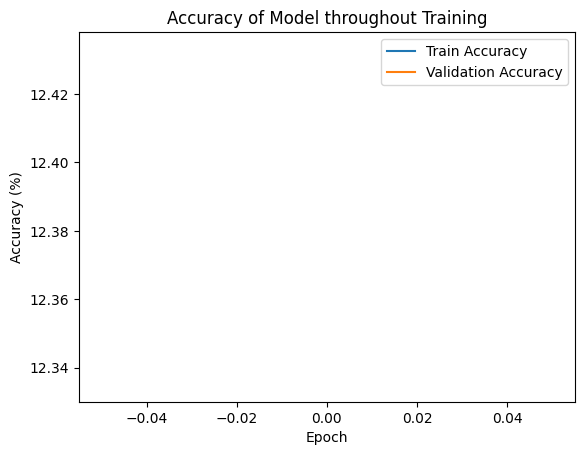

Average Epoch Accuracy: 0.12334987855106136
Epoch is 1


Accuracy is 0.14453125
Accuracy is 0.15625
Accuracy is 0.14713541666666666
Accuracy is 0.1513671875
Accuracy is 0.1546875
Accuracy is 0.15690104166666666
Accuracy is 0.16127232142857142
Accuracy is 0.16455078125
Accuracy is 0.1636284722222222
Accuracy is 0.167578125
Accuracy is 0.16477272727272727
Accuracy is 0.16341145833333334
Accuracy is 0.1658653846153846
Accuracy is 0.16713169642857142
Accuracy is 0.16666666666666666
Accuracy is 0.16845703125
Accuracy is 0.16773897058823528
Accuracy is 0.16927083333333334
Accuracy is 0.17228618421052633
Accuracy is 0.1734375
Accuracy is 0.17485119047619047
Accuracy is 0.17826704545454544
Accuracy is 0.17764945652173914
Accuracy is 0.1796875
Accuracy is 0.180625
Accuracy is 0.18224158653846154
Accuracy is 0.1830150462962963
Accuracy is 0.18373325892857142
Accuracy is 0.1827855603448276
Accuracy is 0.18307291666666667
Accuracy is 0.1844758064516129
Accuracy is 0.1864013671875
Accuracy is 0.18809185606060605
Accuracy is 0.18887867647058823
Accuracy i

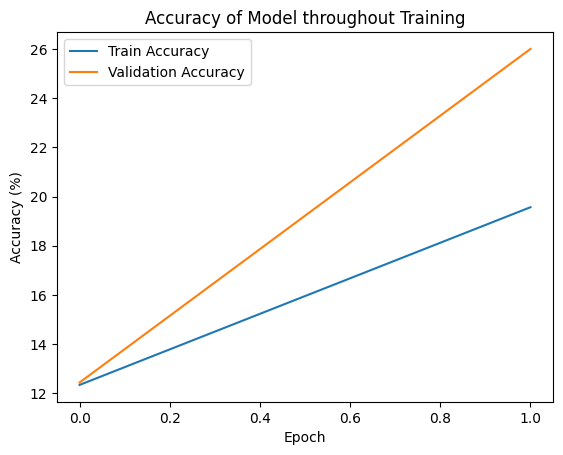

Average Epoch Accuracy: 0.19569120287253142
Epoch is 2


Accuracy is 0.28125
Accuracy is 0.236328125
Accuracy is 0.22916666666666666
Accuracy is 0.2236328125
Accuracy is 0.21953125
Accuracy is 0.216796875
Accuracy is 0.21372767857142858
Accuracy is 0.212890625
Accuracy is 0.2165798611111111
Accuracy is 0.213671875
Accuracy is 0.21306818181818182
Accuracy is 0.21744791666666666
Accuracy is 0.2205528846153846
Accuracy is 0.22014508928571427
Accuracy is 0.21927083333333333
Accuracy is 0.22119140625
Accuracy is 0.21737132352941177
Accuracy is 0.21875
Accuracy is 0.22142269736842105
Accuracy is 0.2236328125
Accuracy is 0.22433035714285715
Accuracy is 0.22585227272727273
Accuracy is 0.22775135869565216
Accuracy is 0.22916666666666666
Accuracy is 0.23078125
Accuracy is 0.23167067307692307
Accuracy is 0.22974537037037038
Accuracy is 0.23060825892857142
Accuracy is 0.2299299568965517
Accuracy is 0.23033854166666667
Accuracy is 0.23235887096774194
Accuracy is 0.2318115234375
Accuracy is 0.2334280303030303
Accuracy is 0.23368566176470587
Accuracy is 0.

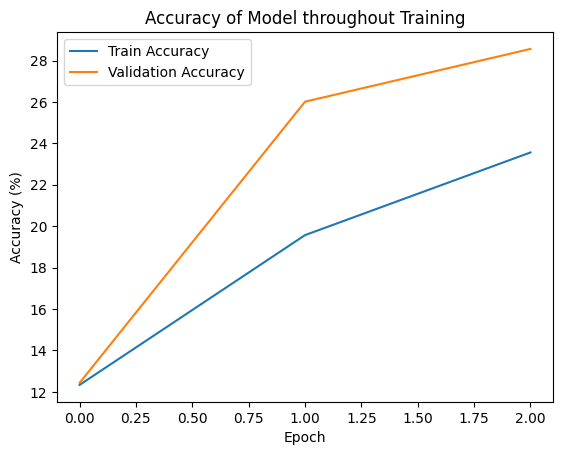

Average Epoch Accuracy: 0.23561094096525503
Epoch is 3


Accuracy is 0.27734375
Accuracy is 0.259765625
Accuracy is 0.2643229166666667
Accuracy is 0.24609375
Accuracy is 0.25390625
Accuracy is 0.2571614583333333
Accuracy is 0.2533482142857143
Accuracy is 0.2548828125
Accuracy is 0.2552083333333333
Accuracy is 0.25625
Accuracy is 0.2567471590909091
Accuracy is 0.2542317708333333
Accuracy is 0.25631009615384615
Accuracy is 0.255859375
Accuracy is 0.2598958333333333
Accuracy is 0.260009765625
Accuracy is 0.2585018382352941
Accuracy is 0.2591145833333333
Accuracy is 0.2604851973684211
Accuracy is 0.2611328125
Accuracy is 0.26264880952380953
Accuracy is 0.26598011363636365
Accuracy is 0.2680027173913043
Accuracy is 0.2682291666666667
Accuracy is 0.2690625
Accuracy is 0.26908052884615385
Accuracy is 0.26938657407407407
Accuracy is 0.2705078125
Accuracy is 0.2711476293103448
Accuracy is 0.27369791666666665
Accuracy is 0.27444556451612906
Accuracy is 0.27490234375
Accuracy is 0.2754498106060606
Accuracy is 0.2747012867647059
Accuracy is 0.2729910714

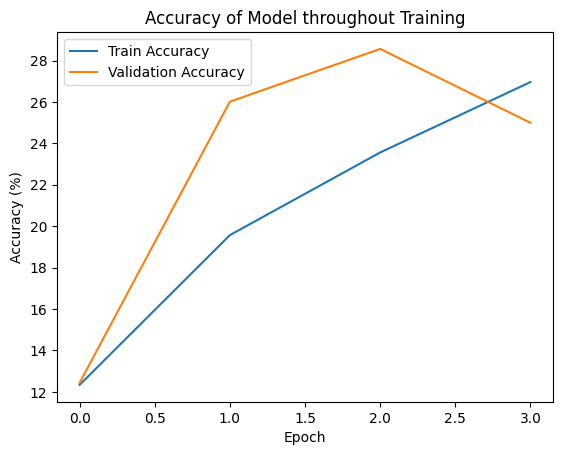

Average Epoch Accuracy: 0.26961664378498257
Epoch is 4


Accuracy is 0.234375
Accuracy is 0.208984375
Accuracy is 0.21875
Accuracy is 0.232421875
Accuracy is 0.23125
Accuracy is 0.24283854166666666
Accuracy is 0.24497767857142858
Accuracy is 0.24267578125
Accuracy is 0.2443576388888889
Accuracy is 0.244921875
Accuracy is 0.24467329545454544
Accuracy is 0.24934895833333334
Accuracy is 0.25210336538461536
Accuracy is 0.25474330357142855
Accuracy is 0.25286458333333334
Accuracy is 0.2529296875
Accuracy is 0.2536764705882353
Accuracy is 0.2543402777777778
Accuracy is 0.25678453947368424
Accuracy is 0.259765625
Accuracy is 0.26023065476190477
Accuracy is 0.26171875
Accuracy is 0.262398097826087
Accuracy is 0.2625325520833333
Accuracy is 0.26171875
Accuracy is 0.2605168269230769
Accuracy is 0.26142939814814814
Accuracy is 0.26241629464285715
Accuracy is 0.26549030172413796
Accuracy is 0.2669270833333333
Accuracy is 0.2661290322580645
Accuracy is 0.2628173828125
Accuracy is 0.2626657196969697
Accuracy is 0.26091452205882354
Accuracy is 0.2587053571

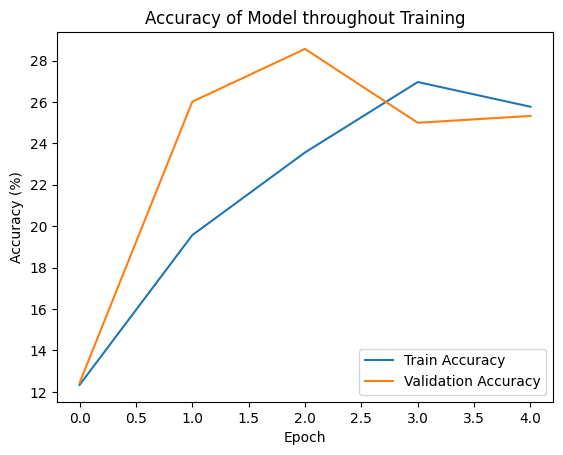

Average Epoch Accuracy: 0.2576829654662583
Epoch is 5


Accuracy is 0.2890625
Accuracy is 0.2578125
Accuracy is 0.25390625
Accuracy is 0.251953125
Accuracy is 0.2578125
Accuracy is 0.2610677083333333
Accuracy is 0.25279017857142855
Accuracy is 0.25439453125
Accuracy is 0.2560763888888889
Accuracy is 0.258203125
Accuracy is 0.26207386363636365
Accuracy is 0.2646484375
Accuracy is 0.26412259615384615
Accuracy is 0.2670200892857143
Accuracy is 0.26614583333333336
Accuracy is 0.262939453125
Accuracy is 0.2626378676470588
Accuracy is 0.2628038194444444
Accuracy is 0.2613075657894737
Accuracy is 0.2603515625
Accuracy is 0.26339285714285715
Accuracy is 0.2649147727272727
Accuracy is 0.265625
Accuracy is 0.265625
Accuracy is 0.26625
Accuracy is 0.2678786057692308
Accuracy is 0.26924189814814814
Accuracy is 0.267578125
Accuracy is 0.27020474137931033
Accuracy is 0.27122395833333335
Accuracy is 0.2707913306451613
Accuracy is 0.272705078125
Accuracy is 0.2728456439393939
Accuracy is 0.2732077205882353
Accuracy is 0.2732142857142857
Accuracy is 0.27343

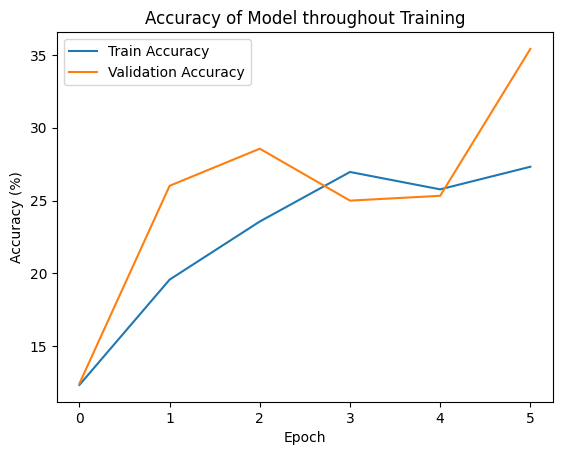

Average Epoch Accuracy: 0.2732073080578731
Epoch is 6


Accuracy is 0.3125
Accuracy is 0.279296875
Accuracy is 0.3020833333333333
Accuracy is 0.3037109375
Accuracy is 0.296875
Accuracy is 0.3033854166666667
Accuracy is 0.30691964285714285
Accuracy is 0.310546875
Accuracy is 0.3077256944444444
Accuracy is 0.30390625
Accuracy is 0.3064630681818182
Accuracy is 0.306640625
Accuracy is 0.3058894230769231
Accuracy is 0.30775669642857145
Accuracy is 0.30625
Accuracy is 0.30126953125
Accuracy is 0.30078125
Accuracy is 0.2994791666666667
Accuracy is 0.29995888157894735
Accuracy is 0.30234375
Accuracy is 0.30171130952380953
Accuracy is 0.3016690340909091
Accuracy is 0.3023097826086957
Accuracy is 0.3028971354166667
Accuracy is 0.30140625
Accuracy is 0.3004807692307692
Accuracy is 0.30179398148148145
Accuracy is 0.3021763392857143
Accuracy is 0.3041487068965517
Accuracy is 0.30546875
Accuracy is 0.3089717741935484
Accuracy is 0.3089599609375
Accuracy is 0.30906723484848486
Accuracy is 0.31066176470588236
Accuracy is 0.3104910714285714
Accuracy is 0.31

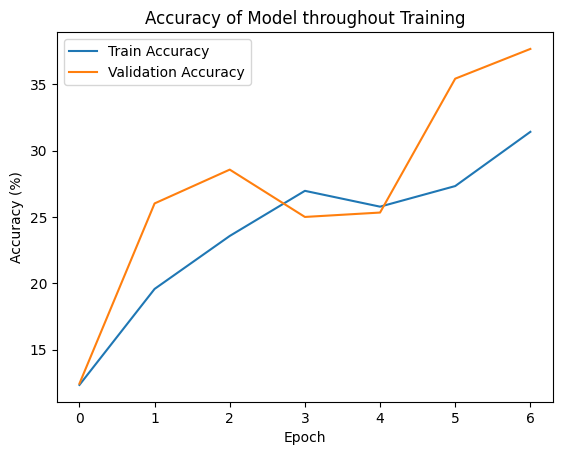

Average Epoch Accuracy: 0.31407751610518536
Epoch is 7


Accuracy is 0.32421875
Accuracy is 0.28515625
Accuracy is 0.3125
Accuracy is 0.3056640625
Accuracy is 0.31640625
Accuracy is 0.3203125
Accuracy is 0.31919642857142855
Accuracy is 0.31787109375
Accuracy is 0.3177083333333333
Accuracy is 0.3234375
Accuracy is 0.3210227272727273
Accuracy is 0.322265625
Accuracy is 0.32872596153846156
Accuracy is 0.3314732142857143
Accuracy is 0.3341145833333333
Accuracy is 0.33740234375
Accuracy is 0.34099264705882354
Accuracy is 0.3459201388888889
Accuracy is 0.3462171052631579
Accuracy is 0.347265625
Accuracy is 0.34802827380952384
Accuracy is 0.3485440340909091
Accuracy is 0.3502038043478261
Accuracy is 0.3513997395833333
Accuracy is 0.3540625
Accuracy is 0.3538161057692308
Accuracy is 0.3493923611111111
Accuracy is 0.34877232142857145
Accuracy is 0.3467133620689655
Accuracy is 0.3424479166666667
Accuracy is 0.3432459677419355
Accuracy is 0.34423828125
Accuracy is 0.34339488636363635
Accuracy is 0.3435202205882353
Accuracy is 0.3417410714285714
Accurac

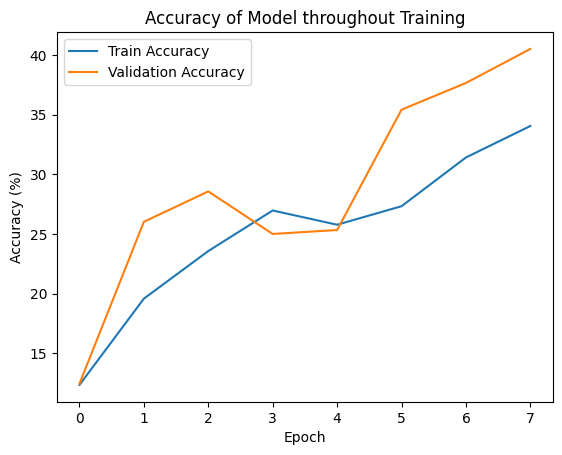

Average Epoch Accuracy: 0.3404794592882036
Epoch is 8


Accuracy is 0.34375
Accuracy is 0.330078125
Accuracy is 0.33984375
Accuracy is 0.3359375
Accuracy is 0.32265625
Accuracy is 0.3255208333333333
Accuracy is 0.32533482142857145
Accuracy is 0.3310546875
Accuracy is 0.3372395833333333
Accuracy is 0.3421875
Accuracy is 0.3405539772727273
Accuracy is 0.3414713541666667
Accuracy is 0.34435096153846156
Accuracy is 0.33956473214285715
Accuracy is 0.34010416666666665
Accuracy is 0.341552734375
Accuracy is 0.3460477941176471
Accuracy is 0.3491753472222222
Accuracy is 0.35135690789473684
Accuracy is 0.3521484375
Accuracy is 0.35453869047619047
Accuracy is 0.3567116477272727
Accuracy is 0.35920516304347827
Accuracy is 0.3621419270833333
Accuracy is 0.36296875
Accuracy is 0.3629807692307692
Accuracy is 0.3619791666666667
Accuracy is 0.36300223214285715
Accuracy is 0.3643588362068966
Accuracy is 0.3658854166666667
Accuracy is 0.36794354838709675
Accuracy is 0.367919921875
Accuracy is 0.3683712121212121
Accuracy is 0.3689108455882353
Accuracy is 0.370

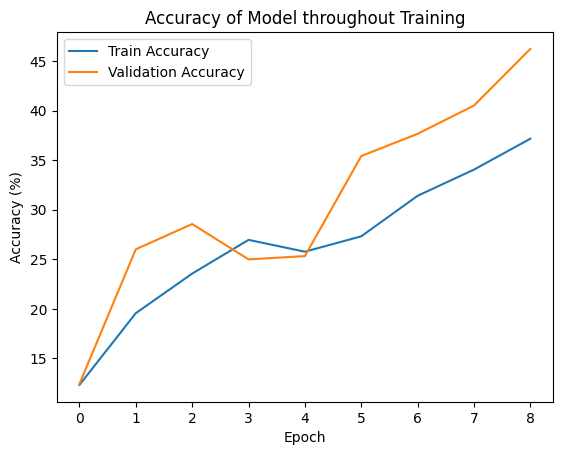

Average Epoch Accuracy: 0.37163375224416517
Epoch is 9


Accuracy is 0.35546875
Accuracy is 0.388671875
Accuracy is 0.39453125
Accuracy is 0.3984375
Accuracy is 0.3953125
Accuracy is 0.3971354166666667
Accuracy is 0.3950892857142857
Accuracy is 0.400390625
Accuracy is 0.3980034722222222
Accuracy is 0.396875
Accuracy is 0.4012784090909091
Accuracy is 0.3987630208333333
Accuracy is 0.40444711538461536
Accuracy is 0.40122767857142855
Accuracy is 0.40078125
Accuracy is 0.3994140625
Accuracy is 0.3952205882352941
Accuracy is 0.3962673611111111
Accuracy is 0.39761513157894735
Accuracy is 0.3970703125
Accuracy is 0.39639136904761907
Accuracy is 0.3943536931818182
Accuracy is 0.39504076086956524
Accuracy is 0.39501953125
Accuracy is 0.39390625
Accuracy is 0.39438100961538464
Accuracy is 0.3949652777777778
Accuracy is 0.39383370535714285
Accuracy is 0.3939924568965517
Accuracy is 0.3951822916666667
Accuracy is 0.3966733870967742
Accuracy is 0.3966064453125
Accuracy is 0.3995028409090909
Accuracy is 0.40085018382352944
Accuracy is 0.40122767857142855


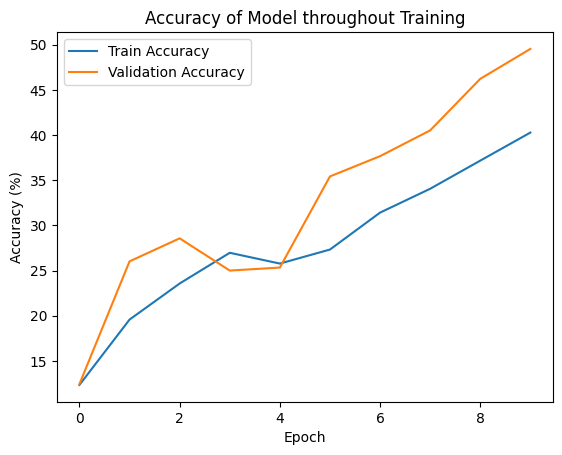

Average Epoch Accuracy: 0.4026824374273947
Epoch is 10


Accuracy is 0.4609375
Accuracy is 0.4453125
Accuracy is 0.4440104166666667
Accuracy is 0.4326171875
Accuracy is 0.4359375
Accuracy is 0.4270833333333333
Accuracy is 0.4302455357142857
Accuracy is 0.41845703125
Accuracy is 0.4262152777777778
Accuracy is 0.423828125
Accuracy is 0.4275568181818182
Accuracy is 0.427734375
Accuracy is 0.4269831730769231
Accuracy is 0.42885044642857145
Accuracy is 0.42942708333333335
Accuracy is 0.429443359375
Accuracy is 0.43083639705882354
Accuracy is 0.4314236111111111
Accuracy is 0.4329769736842105
Accuracy is 0.4333984375
Accuracy is 0.43210565476190477
Accuracy is 0.43004261363636365
Accuracy is 0.42866847826086957
Accuracy is 0.43212890625
Accuracy is 0.42984375
Accuracy is 0.4284855769230769
Accuracy is 0.4266493055555556
Accuracy is 0.4271763392857143
Accuracy is 0.42658943965517243
Accuracy is 0.4264322916666667
Accuracy is 0.42729334677419356
Accuracy is 0.427734375
Accuracy is 0.42826704545454547
Accuracy is 0.4275045955882353
Accuracy is 0.42678

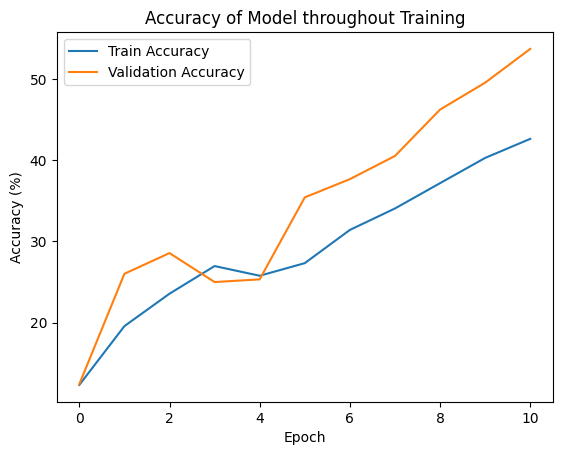

Average Epoch Accuracy: 0.4261273629739149
Epoch is 11


Accuracy is 0.421875
Accuracy is 0.408203125
Accuracy is 0.4049479166666667
Accuracy is 0.423828125
Accuracy is 0.428125
Accuracy is 0.4309895833333333
Accuracy is 0.43136160714285715
Accuracy is 0.4306640625
Accuracy is 0.43359375
Accuracy is 0.43828125
Accuracy is 0.4367897727272727
Accuracy is 0.4348958333333333
Accuracy is 0.43509615384615385
Accuracy is 0.435546875
Accuracy is 0.4359375
Accuracy is 0.435546875
Accuracy is 0.43405330882352944
Accuracy is 0.4329427083333333
Accuracy is 0.43729440789473684
Accuracy is 0.4361328125
Accuracy is 0.43638392857142855
Accuracy is 0.43501420454545453
Accuracy is 0.43461277173913043
Accuracy is 0.4375
Accuracy is 0.4384375
Accuracy is 0.4378004807692308
Accuracy is 0.4390914351851852
Accuracy is 0.4404296875
Accuracy is 0.44167564655172414
Accuracy is 0.4412760416666667
Accuracy is 0.4410282258064516
Accuracy is 0.441650390625
Accuracy is 0.4424715909090909
Accuracy is 0.44289981617647056
Accuracy is 0.4419642857142857
Accuracy is 0.44227430

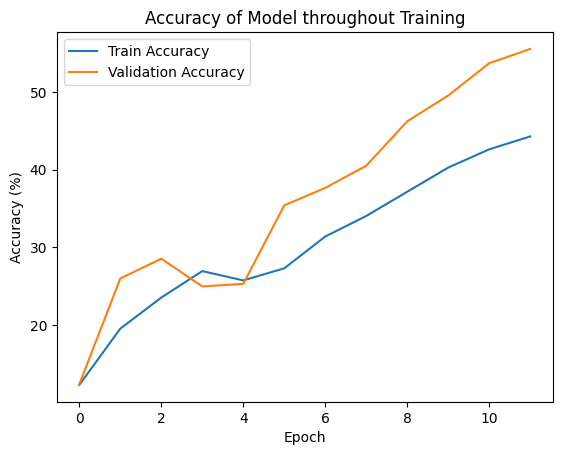

Average Epoch Accuracy: 0.4427077832928504
Epoch is 12


Accuracy is 0.47265625
Accuracy is 0.453125
Accuracy is 0.4401041666666667
Accuracy is 0.4541015625
Accuracy is 0.44921875
Accuracy is 0.447265625
Accuracy is 0.45145089285714285
Accuracy is 0.455078125
Accuracy is 0.45703125
Accuracy is 0.459375
Accuracy is 0.45951704545454547
Accuracy is 0.4602864583333333
Accuracy is 0.4636418269230769
Accuracy is 0.4642857142857143
Accuracy is 0.46171875
Accuracy is 0.460205078125
Accuracy is 0.4586397058823529
Accuracy is 0.4555121527777778
Accuracy is 0.45333059210526316
Accuracy is 0.4466796875
Accuracy is 0.44810267857142855
Accuracy is 0.44868607954545453
Accuracy is 0.45040760869565216
Accuracy is 0.4510091145833333
Accuracy is 0.4509375
Accuracy is 0.4504206730769231
Accuracy is 0.45109953703703703
Accuracy is 0.45089285714285715
Accuracy is 0.45110452586206895
Accuracy is 0.4505208333333333
Accuracy is 0.45173891129032256
Accuracy is 0.451904296875
Accuracy is 0.4532433712121212
Accuracy is 0.45197610294117646
Accuracy is 0.4533482142857143

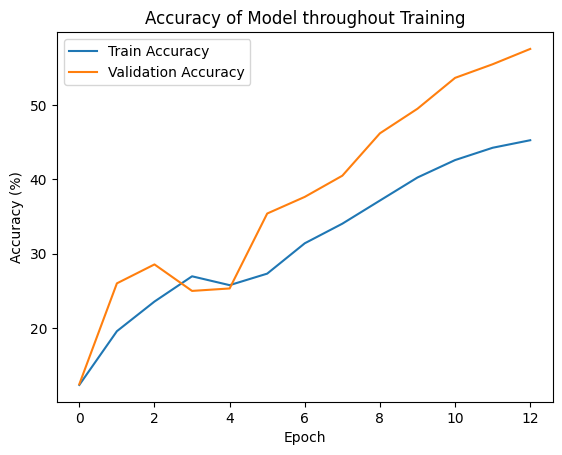

Average Epoch Accuracy: 0.45284612947512937
Epoch is 13


Accuracy is 0.51171875
Accuracy is 0.48828125
Accuracy is 0.4856770833333333
Accuracy is 0.4853515625
Accuracy is 0.484375
Accuracy is 0.478515625
Accuracy is 0.47935267857142855
Accuracy is 0.4658203125
Accuracy is 0.4613715277777778
Accuracy is 0.45625
Accuracy is 0.4524147727272727
Accuracy is 0.455078125
Accuracy is 0.45703125
Accuracy is 0.45228794642857145
Accuracy is 0.45
Accuracy is 0.4482421875
Accuracy is 0.44347426470588236
Accuracy is 0.4427083333333333
Accuracy is 0.4438733552631579
Accuracy is 0.44375
Accuracy is 0.44624255952380953
Accuracy is 0.4479758522727273
Accuracy is 0.4478600543478261
Accuracy is 0.4475911458333333
Accuracy is 0.446875
Accuracy is 0.4463641826923077
Accuracy is 0.4453125
Accuracy is 0.44740513392857145
Accuracy is 0.4457165948275862
Accuracy is 0.44752604166666665
Accuracy is 0.4483366935483871
Accuracy is 0.4488525390625
Accuracy is 0.4480350378787879
Accuracy is 0.4482996323529412
Accuracy is 0.4484375
Accuracy is 0.4493272569444444
Accuracy is

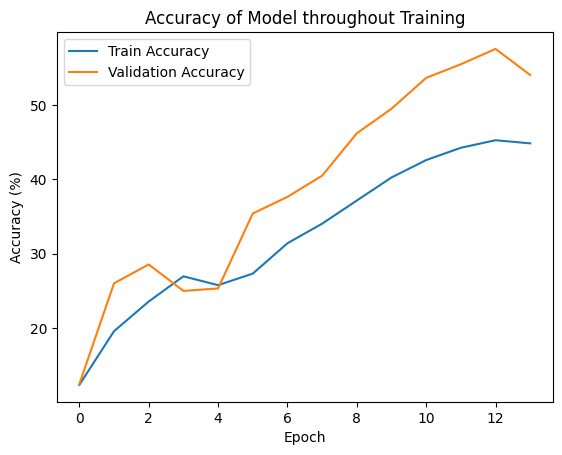

Average Epoch Accuracy: 0.44862181856584643
Epoch is 14


Accuracy is 0.44921875
Accuracy is 0.44140625
Accuracy is 0.4361979166666667
Accuracy is 0.4453125
Accuracy is 0.45
Accuracy is 0.4524739583333333
Accuracy is 0.453125
Accuracy is 0.45166015625
Accuracy is 0.4578993055555556
Accuracy is 0.4640625
Accuracy is 0.4705255681818182
Accuracy is 0.47265625
Accuracy is 0.4795673076923077
Accuracy is 0.47739955357142855
Accuracy is 0.4765625
Accuracy is 0.4794921875
Accuracy is 0.4813878676470588
Accuracy is 0.4791666666666667
Accuracy is 0.4765625
Accuracy is 0.4779296875
Accuracy is 0.4799107142857143
Accuracy is 0.4794034090909091
Accuracy is 0.47927989130434784
Accuracy is 0.4772135416666667
Accuracy is 0.47765625
Accuracy is 0.478515625
Accuracy is 0.4781539351851852
Accuracy is 0.4790736607142857
Accuracy is 0.4787176724137931
Accuracy is 0.48020833333333335
Accuracy is 0.48046875
Accuracy is 0.4798583984375
Accuracy is 0.4805871212121212
Accuracy is 0.48299632352941174
Accuracy is 0.48292410714285716
Accuracy is 0.4831814236111111
Accura

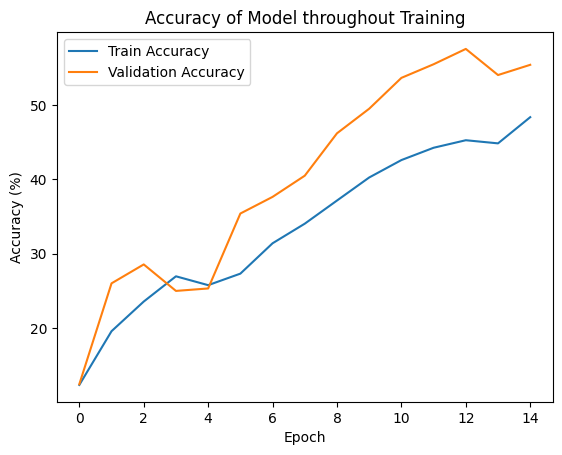

Average Epoch Accuracy: 0.4838948146583589
Epoch is 15


Accuracy is 0.4921875
Accuracy is 0.509765625
Accuracy is 0.5026041666666666
Accuracy is 0.5009765625
Accuracy is 0.503125
Accuracy is 0.4986979166666667
Accuracy is 0.4966517857142857
Accuracy is 0.494140625
Accuracy is 0.5
Accuracy is 0.502734375
Accuracy is 0.5007102272727273
Accuracy is 0.5022786458333334
Accuracy is 0.5057091346153846
Accuracy is 0.505859375
Accuracy is 0.5052083333333334
Accuracy is 0.500732421875
Accuracy is 0.49793198529411764
Accuracy is 0.4997829861111111
Accuracy is 0.4925986842105263
Accuracy is 0.49140625
Accuracy is 0.49069940476190477
Accuracy is 0.4884588068181818
Accuracy is 0.4898097826086957
Accuracy is 0.490234375
Accuracy is 0.49
Accuracy is 0.48843149038461536
Accuracy is 0.4887152777777778
Accuracy is 0.48856026785714285
Accuracy is 0.4886853448275862
Accuracy is 0.4889322916666667
Accuracy is 0.4904233870967742
Accuracy is 0.489501953125
Accuracy is 0.48993844696969696
Accuracy is 0.49103860294117646
Accuracy is 0.4916294642857143
Accuracy is 0.

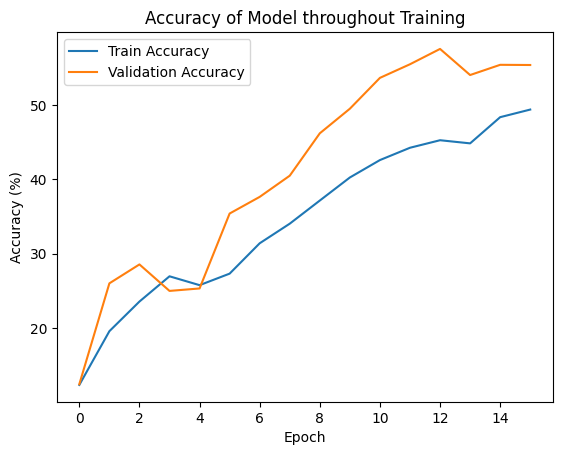

Average Epoch Accuracy: 0.4941387686133699
Epoch is 16


Accuracy is 0.5078125
Accuracy is 0.4921875
Accuracy is 0.4921875
Accuracy is 0.494140625
Accuracy is 0.5
Accuracy is 0.501953125
Accuracy is 0.5011160714285714
Accuracy is 0.5078125
Accuracy is 0.50390625
Accuracy is 0.506640625
Accuracy is 0.5060369318181818
Accuracy is 0.5071614583333334
Accuracy is 0.5087139423076923
Accuracy is 0.5083705357142857
Accuracy is 0.5096354166666667
Accuracy is 0.509521484375
Accuracy is 0.5089613970588235
Accuracy is 0.5091145833333334
Accuracy is 0.5113075657894737
Accuracy is 0.5083984375
Accuracy is 0.5100446428571429
Accuracy is 0.5092329545454546
Accuracy is 0.5084918478260869
Accuracy is 0.505859375
Accuracy is 0.50484375
Accuracy is 0.5057091346153846
Accuracy is 0.5057870370370371
Accuracy is 0.5072544642857143
Accuracy is 0.5092941810344828
Accuracy is 0.5108072916666667
Accuracy is 0.5093245967741935
Accuracy is 0.5078125
Accuracy is 0.5082859848484849
Accuracy is 0.5060891544117647
Accuracy is 0.5066964285714286
Accuracy is 0.506618923611111

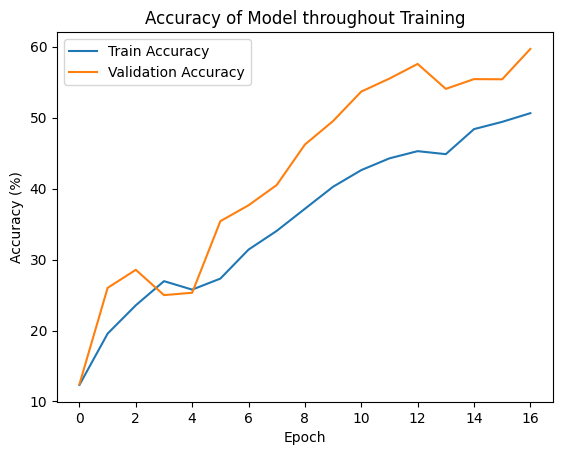

Average Epoch Accuracy: 0.5063892702502905
Epoch is 17


Accuracy is 0.51953125
Accuracy is 0.541015625
Accuracy is 0.5403645833333334
Accuracy is 0.5380859375
Accuracy is 0.53125
Accuracy is 0.5299479166666666
Accuracy is 0.5279017857142857
Accuracy is 0.52978515625
Accuracy is 0.5282118055555556
Accuracy is 0.525
Accuracy is 0.5237926136363636
Accuracy is 0.521484375
Accuracy is 0.5234375
Accuracy is 0.5234375
Accuracy is 0.52265625
Accuracy is 0.523681640625
Accuracy is 0.5250459558823529
Accuracy is 0.5232204861111112
Accuracy is 0.5252878289473685
Accuracy is 0.524609375
Accuracy is 0.5256696428571429
Accuracy is 0.5271661931818182
Accuracy is 0.5242866847826086
Accuracy is 0.5231119791666666
Accuracy is 0.5225
Accuracy is 0.5223858173076923
Accuracy is 0.5218460648148148
Accuracy is 0.5205078125
Accuracy is 0.521551724137931
Accuracy is 0.5212239583333333
Accuracy is 0.5202872983870968
Accuracy is 0.520263671875
Accuracy is 0.5205965909090909
Accuracy is 0.5193014705882353
Accuracy is 0.5199776785714286
Accuracy is 0.5203993055555556
A

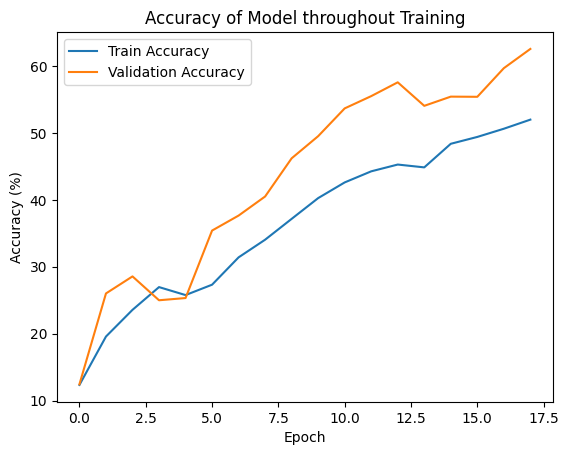

Average Epoch Accuracy: 0.5200126729327279
Epoch is 18


Accuracy is 0.53125
Accuracy is 0.54296875
Accuracy is 0.5442708333333334
Accuracy is 0.541015625
Accuracy is 0.5265625
Accuracy is 0.529296875
Accuracy is 0.5284598214285714
Accuracy is 0.52783203125
Accuracy is 0.5303819444444444
Accuracy is 0.530859375
Accuracy is 0.53125
Accuracy is 0.5289713541666666
Accuracy is 0.52734375
Accuracy is 0.5259486607142857
Accuracy is 0.5263020833333333
Accuracy is 0.52587890625
Accuracy is 0.5255055147058824
Accuracy is 0.5251736111111112
Accuracy is 0.5254934210526315
Accuracy is 0.52578125
Accuracy is 0.5249255952380952
Accuracy is 0.5239701704545454
Accuracy is 0.5241168478260869
Accuracy is 0.52099609375
Accuracy is 0.519375
Accuracy is 0.5207331730769231
Accuracy is 0.5198206018518519
Accuracy is 0.5192522321428571
Accuracy is 0.5204741379310345
Accuracy is 0.521484375
Accuracy is 0.522429435483871
Accuracy is 0.524658203125
Accuracy is 0.5240293560606061
Accuracy is 0.5233226102941176
Accuracy is 0.52421875
Accuracy is 0.5235460069444444
Accur

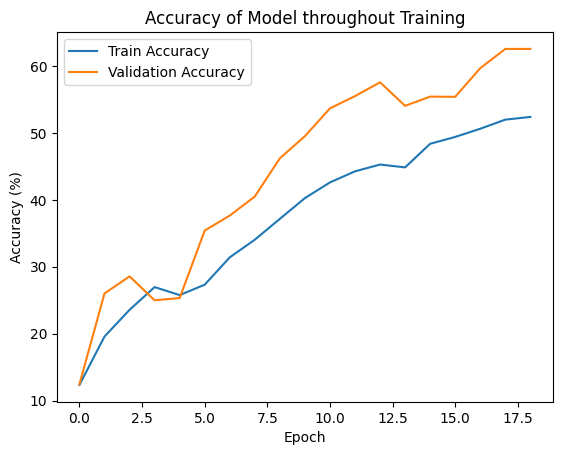

Average Epoch Accuracy: 0.5240257682965467
Epoch is 19


Accuracy is 0.61328125
Accuracy is 0.58984375
Accuracy is 0.5768229166666666
Accuracy is 0.5634765625
Accuracy is 0.55390625
Accuracy is 0.548828125
Accuracy is 0.5452008928571429
Accuracy is 0.53857421875
Accuracy is 0.5390625
Accuracy is 0.542578125
Accuracy is 0.5369318181818182
Accuracy is 0.5367838541666666
Accuracy is 0.5360576923076923
Accuracy is 0.5401785714285714
Accuracy is 0.5364583333333334
Accuracy is 0.534912109375
Accuracy is 0.5349264705882353
Accuracy is 0.5316840277777778
Accuracy is 0.5337171052631579
Accuracy is 0.5353515625
Accuracy is 0.5329241071428571
Accuracy is 0.5330255681818182
Accuracy is 0.5320991847826086
Accuracy is 0.533203125
Accuracy is 0.5321875
Accuracy is 0.5298978365384616
Accuracy is 0.5292245370370371
Accuracy is 0.5305524553571429
Accuracy is 0.5289601293103449
Accuracy is 0.5282552083333333
Accuracy is 0.5279737903225806
Accuracy is 0.5283203125
Accuracy is 0.5269886363636364
Accuracy is 0.5268841911764706
Accuracy is 0.5254464285714285
Accur

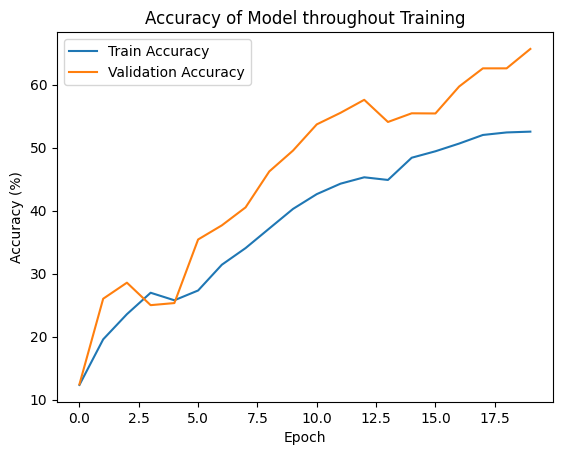

Average Epoch Accuracy: 0.5252930615693315
Epoch is 20


Accuracy is 0.578125
Accuracy is 0.552734375
Accuracy is 0.54296875
Accuracy is 0.5517578125
Accuracy is 0.56171875
Accuracy is 0.556640625
Accuracy is 0.55859375
Accuracy is 0.55615234375
Accuracy is 0.5533854166666666
Accuracy is 0.548828125
Accuracy is 0.5490056818181818
Accuracy is 0.5485026041666666
Accuracy is 0.5501802884615384
Accuracy is 0.5454799107142857
Accuracy is 0.5440104166666667
Accuracy is 0.543212890625
Accuracy is 0.5415900735294118
Accuracy is 0.5421006944444444
Accuracy is 0.5386513157894737
Accuracy is 0.5384765625
Accuracy is 0.5390625
Accuracy is 0.5397727272727273
Accuracy is 0.5399116847826086
Accuracy is 0.5413411458333334
Accuracy is 0.54078125
Accuracy is 0.5420673076923077
Accuracy is 0.5423900462962963
Accuracy is 0.5422712053571429
Accuracy is 0.5437769396551724
Accuracy is 0.5432291666666667
Accuracy is 0.5417086693548387
Accuracy is 0.5421142578125
Accuracy is 0.540719696969697
Accuracy is 0.5403262867647058
Accuracy is 0.5415178571428572
Accuracy is 

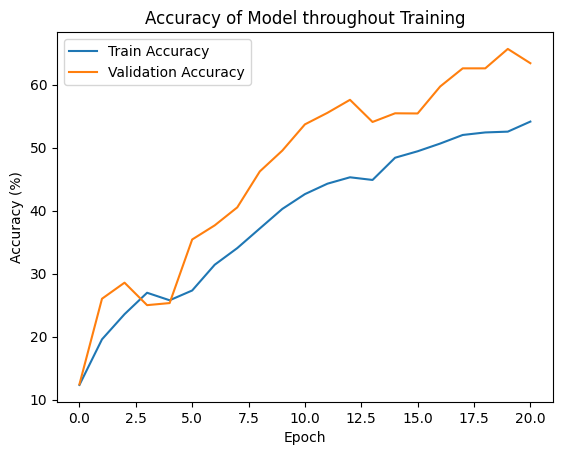

Average Epoch Accuracy: 0.5412398352518746
Epoch is 21


Accuracy is 0.546875
Accuracy is 0.548828125
Accuracy is 0.53125
Accuracy is 0.5322265625
Accuracy is 0.54140625
Accuracy is 0.5423177083333334
Accuracy is 0.5396205357142857
Accuracy is 0.53369140625
Accuracy is 0.5338541666666666
Accuracy is 0.534375
Accuracy is 0.5319602272727273
Accuracy is 0.5328776041666666
Accuracy is 0.5309495192307693
Accuracy is 0.5301339285714286
Accuracy is 0.5278645833333333
Accuracy is 0.528564453125
Accuracy is 0.5275735294117647
Accuracy is 0.52734375
Accuracy is 0.5291940789473685
Accuracy is 0.5275390625
Accuracy is 0.5306919642857143
Accuracy is 0.5317826704545454
Accuracy is 0.5331182065217391
Accuracy is 0.5338541666666666
Accuracy is 0.5346875
Accuracy is 0.5359074519230769
Accuracy is 0.5338541666666666
Accuracy is 0.5322265625
Accuracy is 0.5325969827586207
Accuracy is 0.5342447916666667
Accuracy is 0.5335181451612904
Accuracy is 0.5335693359375
Accuracy is 0.5337357954545454
Accuracy is 0.5328584558823529
Accuracy is 0.5342633928571429
Accuracy

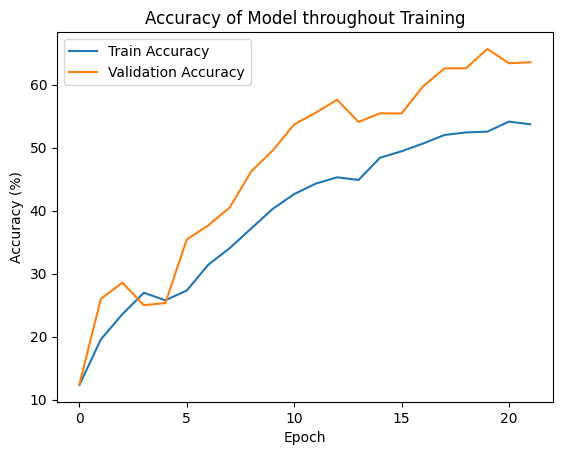

Average Epoch Accuracy: 0.5369099165698595
Epoch is 22


Accuracy is 0.57421875
Accuracy is 0.572265625
Accuracy is 0.5703125
Accuracy is 0.5693359375
Accuracy is 0.57109375
Accuracy is 0.5807291666666666
Accuracy is 0.5747767857142857
Accuracy is 0.578125
Accuracy is 0.5789930555555556
Accuracy is 0.576171875
Accuracy is 0.5738636363636364
Accuracy is 0.57421875
Accuracy is 0.5721153846153846
Accuracy is 0.5666852678571429
Accuracy is 0.5671875
Accuracy is 0.56689453125
Accuracy is 0.5675551470588235
Accuracy is 0.5696614583333334
Accuracy is 0.5662006578947368
Accuracy is 0.5666015625
Accuracy is 0.5669642857142857
Accuracy is 0.5635653409090909
Accuracy is 0.5625
Accuracy is 0.5633138020833334
Accuracy is 0.56390625
Accuracy is 0.5599459134615384
Accuracy is 0.5594618055555556
Accuracy is 0.560546875
Accuracy is 0.5600754310344828
Accuracy is 0.5595052083333333
Accuracy is 0.5592237903225806
Accuracy is 0.557861328125
Accuracy is 0.5566998106060606
Accuracy is 0.5554917279411765
Accuracy is 0.5546875
Accuracy is 0.5541449652777778
Accurac

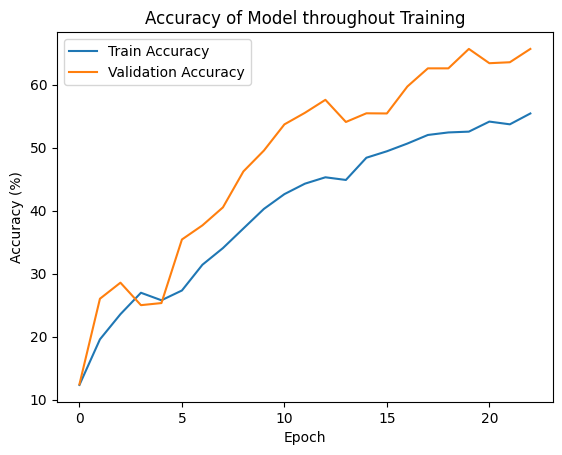

Average Epoch Accuracy: 0.5541239835251874
Epoch is 23


Accuracy is 0.58984375
Accuracy is 0.583984375
Accuracy is 0.5729166666666666
Accuracy is 0.5703125
Accuracy is 0.578125
Accuracy is 0.5787760416666666
Accuracy is 0.5786830357142857
Accuracy is 0.5810546875
Accuracy is 0.5798611111111112
Accuracy is 0.575
Accuracy is 0.5745738636363636
Accuracy is 0.5732421875
Accuracy is 0.5706129807692307
Accuracy is 0.5697544642857143
Accuracy is 0.5705729166666667
Accuracy is 0.56640625
Accuracy is 0.5625
Accuracy is 0.5633680555555556
Accuracy is 0.5620888157894737
Accuracy is 0.562890625
Accuracy is 0.5617559523809523
Accuracy is 0.5635653409090909
Accuracy is 0.5636888586956522
Accuracy is 0.5657552083333334
Accuracy is 0.565625
Accuracy is 0.5679086538461539
Accuracy is 0.5671296296296297
Accuracy is 0.5675223214285714
Accuracy is 0.56640625
Accuracy is 0.5651041666666666
Accuracy is 0.563508064516129
Accuracy is 0.5638427734375
Accuracy is 0.5643939393939394
Accuracy is 0.5633042279411765


Accuracy is 0.5638392857142858
Accuracy is 0.5636935763888888
Accuracy is 0.5633118597528778
Testing model


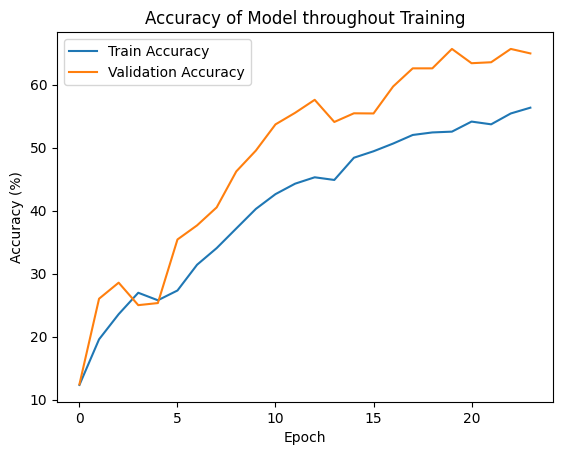

Average Epoch Accuracy: 0.5633118597528778
Epoch is 24


Accuracy is 0.55859375
Accuracy is 0.556640625
Accuracy is 0.5416666666666666
Accuracy is 0.5400390625
Accuracy is 0.54140625
Accuracy is 0.546875
Accuracy is 0.55859375
Accuracy is 0.55712890625
Accuracy is 0.5577256944444444
Accuracy is 0.564453125
Accuracy is 0.5610795454545454
Accuracy is 0.5628255208333334
Accuracy is 0.5625
Accuracy is 0.5636160714285714
Accuracy is 0.5661458333333333
Accuracy is 0.56884765625
Accuracy is 0.5700827205882353
Accuracy is 0.5677083333333334
Accuracy is 0.5662006578947368
Accuracy is 0.5671875
Accuracy is 0.5671502976190477
Accuracy is 0.5687144886363636
Accuracy is 0.5682744565217391
Accuracy is 0.5690104166666666
Accuracy is 0.5684375
Accuracy is 0.5686598557692307
Accuracy is 0.5698784722222222
Accuracy is 0.5697544642857143
Accuracy is 0.5686961206896551
Accuracy is 0.5669270833333333
Accuracy is 0.5671622983870968
Accuracy is 0.568359375
Accuracy is 0.5701941287878788
Accuracy is 0.5699678308823529
Accuracy is 0.5698660714285714
Accuracy is 0.56

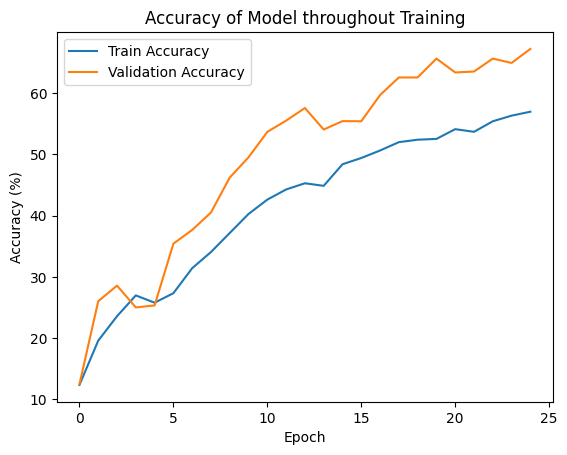

Average Epoch Accuracy: 0.5697539338895342
Epoch is 25


Accuracy is 0.5546875
Accuracy is 0.5703125
Accuracy is 0.5598958333333334
Accuracy is 0.5478515625
Accuracy is 0.553125
Accuracy is 0.5520833333333334
Accuracy is 0.5574776785714286
Accuracy is 0.5576171875
Accuracy is 0.5590277777777778
Accuracy is 0.5640625
Accuracy is 0.5635653409090909
Accuracy is 0.5638020833333334
Accuracy is 0.5643028846153846
Accuracy is 0.5672433035714286
Accuracy is 0.5658854166666667
Accuracy is 0.563720703125
Accuracy is 0.5622702205882353
Accuracy is 0.5616319444444444
Accuracy is 0.5610608552631579
Accuracy is 0.5626953125
Accuracy is 0.5619419642857143
Accuracy is 0.5642755681818182
Accuracy is 0.5658967391304348
Accuracy is 0.5677083333333334
Accuracy is 0.56796875
Accuracy is 0.5668569711538461
Accuracy is 0.5648148148148148
Accuracy is 0.564453125
Accuracy is 0.564385775862069
Accuracy is 0.5670572916666666
Accuracy is 0.5656502016129032
Accuracy is 0.566162109375
Accuracy is 0.5667613636363636
Accuracy is 0.5662913602941176
Accuracy is 0.56595982142

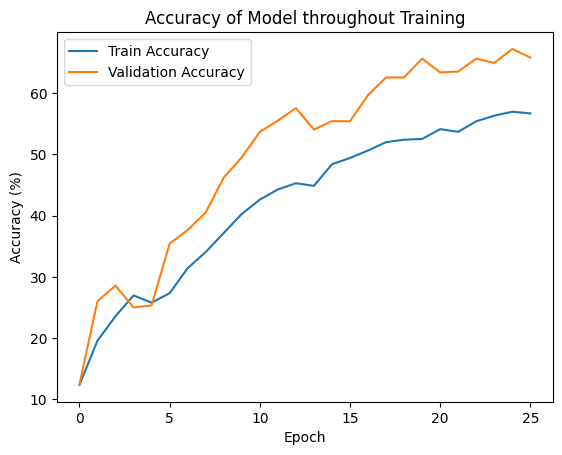

Average Epoch Accuracy: 0.5670081317985004
Epoch is 26


Accuracy is 0.55859375
Accuracy is 0.556640625
Accuracy is 0.5377604166666666
Accuracy is 0.5419921875
Accuracy is 0.54375
Accuracy is 0.552734375
Accuracy is 0.5479910714285714
Accuracy is 0.5537109375
Accuracy is 0.5542534722222222
Accuracy is 0.558984375
Accuracy is 0.5529119318181818
Accuracy is 0.5537109375
Accuracy is 0.5534855769230769
Accuracy is 0.5532924107142857
Accuracy is 0.5557291666666667
Accuracy is 0.559326171875
Accuracy is 0.5590533088235294
Accuracy is 0.5588107638888888
Accuracy is 0.5602384868421053
Accuracy is 0.5619140625
Accuracy is 0.5654761904761905
Accuracy is 0.5678267045454546
Accuracy is 0.5655570652173914
Accuracy is 0.56640625
Accuracy is 0.56609375
Accuracy is 0.5656550480769231
Accuracy is 0.5640914351851852
Accuracy is 0.5637555803571429
Accuracy is 0.5618265086206896
Accuracy is 0.559765625
Accuracy is 0.5598538306451613
Accuracy is 0.5604248046875
Accuracy is 0.5601325757575758
Accuracy is 0.5613511029411765
Accuracy is 0.5616071428571429
Accuracy 

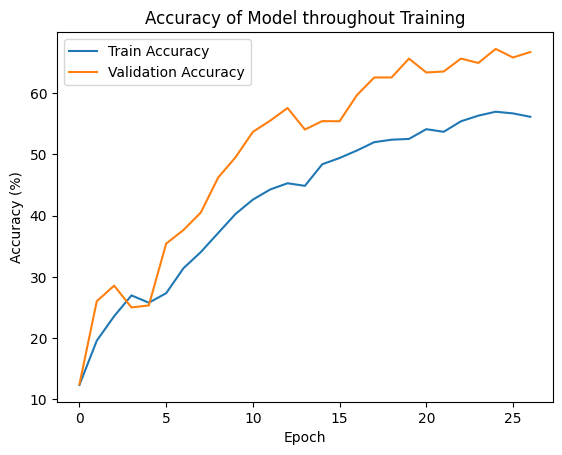

Average Epoch Accuracy: 0.5614109198437005
Epoch is 27


Accuracy is 0.53515625
Accuracy is 0.564453125
Accuracy is 0.59375
Accuracy is 0.5859375
Accuracy is 0.584375
Accuracy is 0.5833333333333334
Accuracy is 0.5831473214285714
Accuracy is 0.58203125
Accuracy is 0.5941840277777778
Accuracy is 0.5921875
Accuracy is 0.59765625
Accuracy is 0.5992838541666666
Accuracy is 0.6015625
Accuracy is 0.6021205357142857
Accuracy is 0.6013020833333333
Accuracy is 0.597412109375
Accuracy is 0.5953584558823529
Accuracy is 0.5961371527777778
Accuracy is 0.5943667763157895
Accuracy is 0.5927734375
Accuracy is 0.5915178571428571
Accuracy is 0.58984375
Accuracy is 0.5896739130434783
Accuracy is 0.5900065104166666
Accuracy is 0.58984375
Accuracy is 0.591796875
Accuracy is 0.5894097222222222
Accuracy is 0.5895647321428571
Accuracy is 0.58984375
Accuracy is 0.58984375
Accuracy is 0.5897177419354839
Accuracy is 0.588623046875
Accuracy is 0.5896070075757576
Accuracy is 0.5888097426470589
Accuracy is 0.5890625
Accuracy is 0.5881076388888888
Accuracy is 0.58908015629

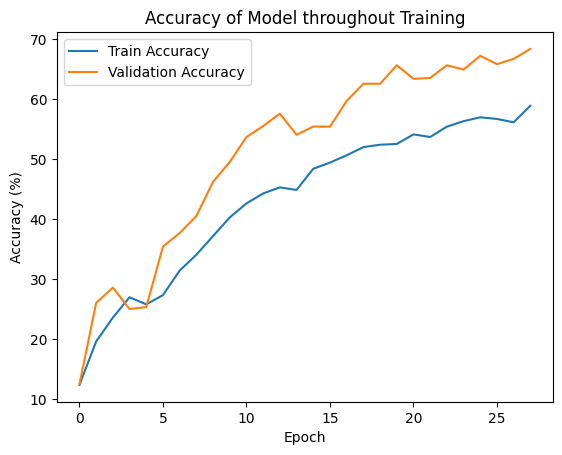

Average Epoch Accuracy: 0.5890801562995036
Epoch is 28


Accuracy is 0.61328125
Accuracy is 0.6015625
Accuracy is 0.59375
Accuracy is 0.5869140625
Accuracy is 0.59453125
Accuracy is 0.5983072916666666
Accuracy is 0.59765625
Accuracy is 0.5986328125
Accuracy is 0.6006944444444444
Accuracy is 0.604296875
Accuracy is 0.6019176136363636
Accuracy is 0.5989583333333334
Accuracy is 0.5943509615384616
Accuracy is 0.5929129464285714
Accuracy is 0.5934895833333333
Accuracy is 0.593017578125
Accuracy is 0.5928308823529411
Accuracy is 0.59375
Accuracy is 0.592516447368421
Accuracy is 0.5900390625
Accuracy is 0.5917038690476191
Accuracy is 0.5903764204545454
Accuracy is 0.5917119565217391
Accuracy is 0.5921223958333334
Accuracy is 0.59203125
Accuracy is 0.5916466346153846
Accuracy is 0.5896990740740741
Accuracy is 0.5884486607142857
Accuracy is 0.587957974137931
Accuracy is 0.5868489583333333
Accuracy is 0.5850554435483871
Accuracy is 0.5843505859375
Accuracy is 0.5841619318181818
Accuracy is 0.5843290441176471
Accuracy is 0.5841517857142857
Accuracy is 

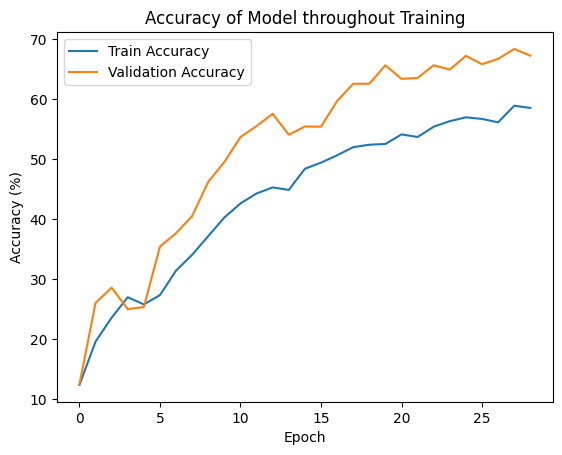

Average Epoch Accuracy: 0.5853838842538811
Epoch is 29


Accuracy is 0.61328125
Accuracy is 0.55859375
Accuracy is 0.5716145833333334
Accuracy is 0.564453125
Accuracy is 0.56640625
Accuracy is 0.57421875
Accuracy is 0.5792410714285714
Accuracy is 0.58544921875
Accuracy is 0.5881076388888888
Accuracy is 0.58984375
Accuracy is 0.5873579545454546
Accuracy is 0.587890625
Accuracy is 0.5862379807692307
Accuracy is 0.5873325892857143
Accuracy is 0.5888020833333333
Accuracy is 0.5908203125
Accuracy is 0.5919117647058824
Accuracy is 0.5933159722222222
Accuracy is 0.5945723684210527
Accuracy is 0.5931640625
Accuracy is 0.5935639880952381
Accuracy is 0.5944602272727273
Accuracy is 0.5922214673913043
Accuracy is 0.5924479166666666
Accuracy is 0.591875
Accuracy is 0.5901442307692307
Accuracy is 0.5902777777777778
Accuracy is 0.5906808035714286
Accuracy is 0.5909213362068966
Accuracy is 0.5921875
Accuracy is 0.5929939516129032
Accuracy is 0.5911865234375
Accuracy is 0.5907907196969697
Accuracy is 0.58984375
Accuracy is 0.58828125
Accuracy is 0.5884331597

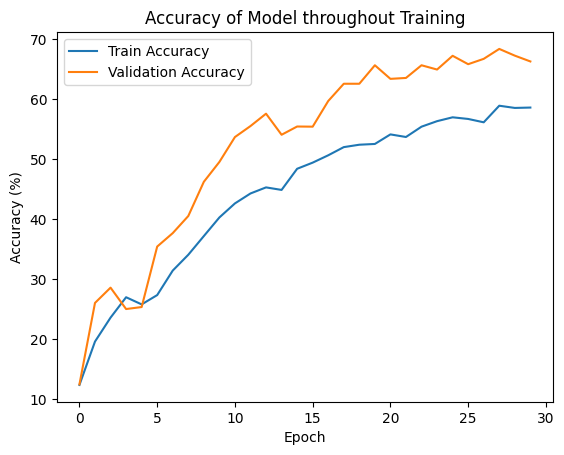

Average Epoch Accuracy: 0.5860175308902735
Epoch is 30


Accuracy is 0.61328125
Accuracy is 0.57421875
Accuracy is 0.5859375
Accuracy is 0.599609375
Accuracy is 0.609375
Accuracy is 0.607421875
Accuracy is 0.6021205357142857
Accuracy is 0.60302734375
Accuracy is 0.59765625
Accuracy is 0.593359375
Accuracy is 0.5891335227272727
Accuracy is 0.5921223958333334
Accuracy is 0.5925480769230769
Accuracy is 0.5915178571428571
Accuracy is 0.5880208333333333
Accuracy is 0.585693359375
Accuracy is 0.5903033088235294
Accuracy is 0.5930989583333334
Accuracy is 0.592516447368421
Accuracy is 0.593359375
Accuracy is 0.5948660714285714
Accuracy is 0.5935724431818182
Accuracy is 0.595108695652174
Accuracy is 0.5953776041666666
Accuracy is 0.5975
Accuracy is 0.5964543269230769
Accuracy is 0.5954861111111112
Accuracy is 0.5959821428571429
Accuracy is 0.5963092672413793
Accuracy is 0.5973958333333333
Accuracy is 0.5979082661290323
Accuracy is 0.5986328125
Accuracy is 0.5997869318181818
Accuracy is 0.5994944852941176
Accuracy is 0.5991071428571428
Accuracy is 0.5

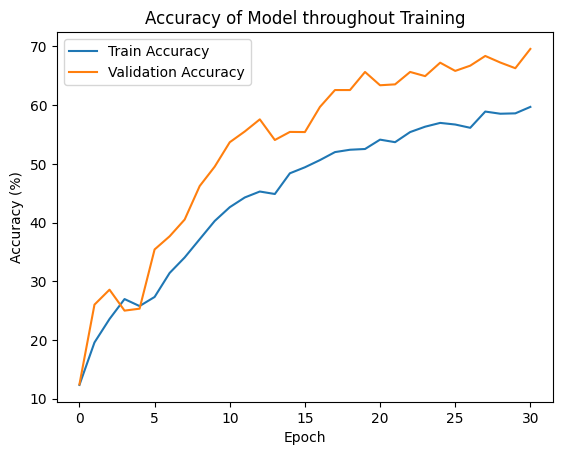

Average Epoch Accuracy: 0.5970007392544091
Epoch is 31


Accuracy is 0.63671875
Accuracy is 0.623046875
Accuracy is 0.60546875
Accuracy is 0.6025390625
Accuracy is 0.60703125
Accuracy is 0.6087239583333334
Accuracy is 0.6127232142857143
Accuracy is 0.611328125
Accuracy is 0.6124131944444444
Accuracy is 0.60625
Accuracy is 0.6036931818181818
Accuracy is 0.6018880208333334
Accuracy is 0.5982572115384616
Accuracy is 0.6012834821428571
Accuracy is 0.5994791666666667
Accuracy is 0.60302734375
Accuracy is 0.5997242647058824
Accuracy is 0.6006944444444444
Accuracy is 0.6019736842105263
Accuracy is 0.60078125
Accuracy is 0.6010044642857143
Accuracy is 0.6017400568181818
Accuracy is 0.6003736413043478
Accuracy is 0.6009114583333334
Accuracy is 0.60140625
Accuracy is 0.6011117788461539
Accuracy is 0.6001157407407407
Accuracy is 0.6001674107142857
Accuracy is 0.5998114224137931
Accuracy is 0.5990885416666667
Accuracy is 0.6010584677419355
Accuracy is 0.601806640625
Accuracy is 0.5996685606060606
Accuracy is 0.5983455882352942
Accuracy is 0.5984375
Accu

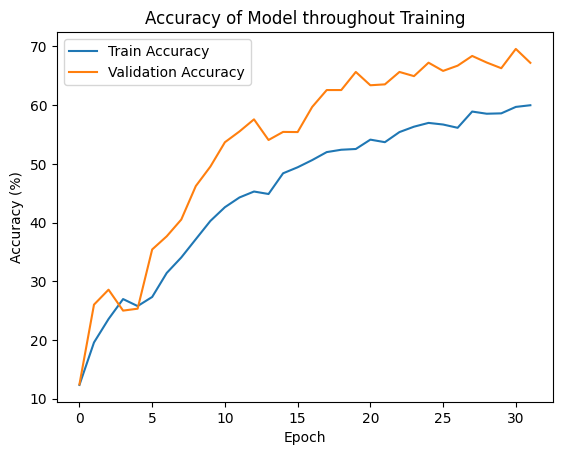

Average Epoch Accuracy: 0.5998521491181751
Epoch is 32


Accuracy is 0.5625
Accuracy is 0.568359375
Accuracy is 0.58984375
Accuracy is 0.583984375
Accuracy is 0.5859375
Accuracy is 0.5924479166666666
Accuracy is 0.5892857142857143
Accuracy is 0.5888671875
Accuracy is 0.5902777777777778
Accuracy is 0.585546875
Accuracy is 0.5841619318181818
Accuracy is 0.5823567708333334
Accuracy is 0.5829326923076923
Accuracy is 0.5828683035714286
Accuracy is 0.58046875
Accuracy is 0.57958984375
Accuracy is 0.5815716911764706
Accuracy is 0.583984375
Accuracy is 0.5867598684210527
Accuracy is 0.5857421875
Accuracy is 0.5881696428571429
Accuracy is 0.5884232954545454
Accuracy is 0.5901834239130435
Accuracy is 0.591796875
Accuracy is 0.59015625
Accuracy is 0.5907451923076923
Accuracy is 0.5911458333333334
Accuracy is 0.5934709821428571
Accuracy is 0.5942887931034483
Accuracy is 0.596875
Accuracy is 0.5989163306451613
Accuracy is 0.5985107421875
Accuracy is 0.5997869318181818
Accuracy is 0.6006433823529411
Accuracy is 0.6005580357142857
Accuracy is 0.6005859375


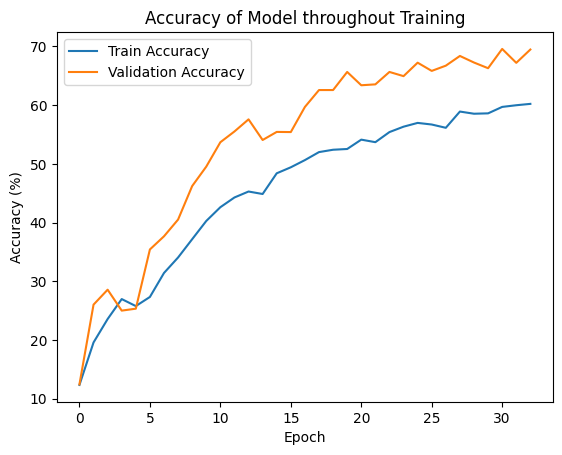

Average Epoch Accuracy: 0.6021755201182807
Epoch is 33


Accuracy is 0.5546875
Accuracy is 0.5625
Accuracy is 0.5729166666666666
Accuracy is 0.5869140625
Accuracy is 0.5953125
Accuracy is 0.5963541666666666
Accuracy is 0.5998883928571429
Accuracy is 0.61083984375
Accuracy is 0.60546875
Accuracy is 0.6109375
Accuracy is 0.6090198863636364
Accuracy is 0.6097005208333334
Accuracy is 0.609375
Accuracy is 0.609375
Accuracy is 0.6078125
Accuracy is 0.608154296875
Accuracy is 0.6073069852941176
Accuracy is 0.6080729166666666
Accuracy is 0.6091694078947368
Accuracy is 0.6076171875
Accuracy is 0.6063988095238095
Accuracy is 0.6029829545454546
Accuracy is 0.6036005434782609
Accuracy is 0.6044921875
Accuracy is 0.60515625
Accuracy is 0.6053185096153846
Accuracy is 0.6053240740740741
Accuracy is 0.603515625
Accuracy is 0.6023706896551724
Accuracy is 0.60234375
Accuracy is 0.6028225806451613
Accuracy is 0.60302734375
Accuracy is 0.6015625
Accuracy is 0.6030560661764706
Accuracy is 0.6044642857142857
Accuracy is 0.6046006944444444
Accuracy is 0.6050269299

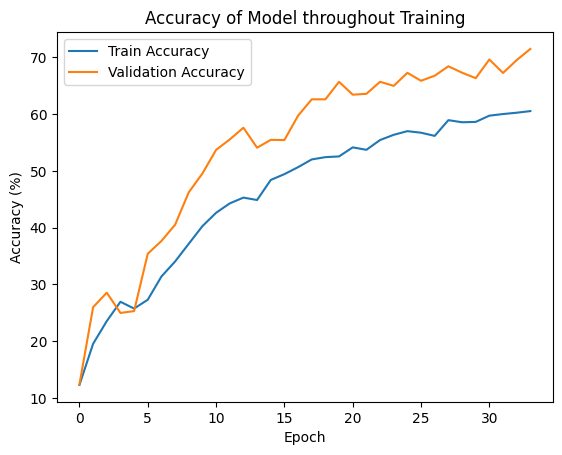

Average Epoch Accuracy: 0.6050269299820467
Epoch is 34


Accuracy is 0.625
Accuracy is 0.62890625
Accuracy is 0.62109375
Accuracy is 0.6240234375
Accuracy is 0.62265625
Accuracy is 0.6184895833333334
Accuracy is 0.6266741071428571
Accuracy is 0.62158203125
Accuracy is 0.6180555555555556
Accuracy is 0.6171875
Accuracy is 0.6157670454545454
Accuracy is 0.6136067708333334
Accuracy is 0.6150841346153846
Accuracy is 0.6166294642857143
Accuracy is 0.6221354166666667
Accuracy is 0.62060546875
Accuracy is 0.6181066176470589
Accuracy is 0.6208767361111112
Accuracy is 0.6252055921052632
Accuracy is 0.6236328125
Accuracy is 0.6216517857142857
Accuracy is 0.6198508522727273
Accuracy is 0.619735054347826
Accuracy is 0.6188151041666666
Accuracy is 0.6178125
Accuracy is 0.6171875
Accuracy is 0.6142939814814815
Accuracy is 0.6127232142857143
Accuracy is 0.6122036637931034
Accuracy is 0.61328125
Accuracy is 0.6123991935483871
Accuracy is 0.6121826171875
Accuracy is 0.6123342803030303
Accuracy is 0.6127068014705882
Accuracy is 0.6131696428571428
Accuracy is 0

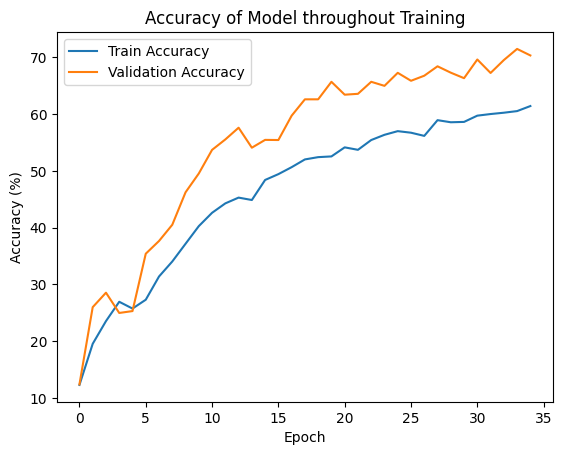

Average Epoch Accuracy: 0.6138979828915408
Epoch is 35


Accuracy is 0.58984375
Accuracy is 0.578125
Accuracy is 0.5989583333333334
Accuracy is 0.603515625
Accuracy is 0.61171875
Accuracy is 0.6171875
Accuracy is 0.6127232142857143
Accuracy is 0.60986328125
Accuracy is 0.6098090277777778
Accuracy is 0.613671875
Accuracy is 0.61328125
Accuracy is 0.6123046875
Accuracy is 0.6129807692307693
Accuracy is 0.6110491071428571
Accuracy is 0.6130208333333333
Accuracy is 0.6123046875
Accuracy is 0.6107536764705882
Accuracy is 0.6111111111111112
Accuracy is 0.6149259868421053
Accuracy is 0.6177734375
Accuracy is 0.6194196428571429
Accuracy is 0.6171875
Accuracy is 0.6180366847826086
Accuracy is 0.61865234375
Accuracy is 0.6165625
Accuracy is 0.6173377403846154
Accuracy is 0.6171875
Accuracy is 0.6177455357142857
Accuracy is 0.6165140086206896
Accuracy is 0.61796875
Accuracy is 0.6185735887096774
Accuracy is 0.61865234375
Accuracy is 0.6176609848484849
Accuracy is 0.6179917279411765
Accuracy is 0.6165178571428571
Accuracy is 0.6156684027777778
Accuracy 

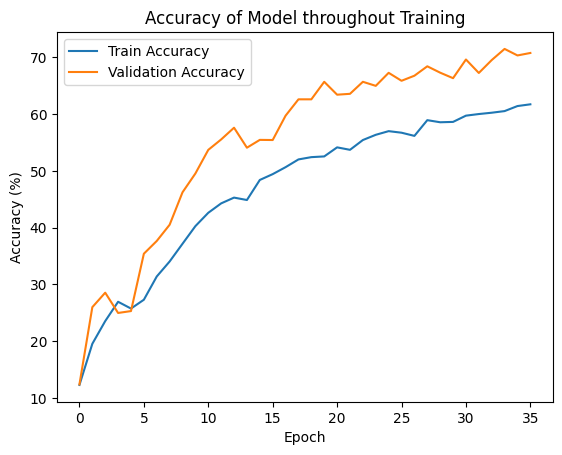

Average Epoch Accuracy: 0.6169606083007709
Epoch is 36


Accuracy is 0.62890625
Accuracy is 0.6015625
Accuracy is 0.6236979166666666
Accuracy is 0.6064453125
Accuracy is 0.61796875
Accuracy is 0.6223958333333334
Accuracy is 0.6233258928571429
Accuracy is 0.62841796875
Accuracy is 0.6332465277777778
Accuracy is 0.633203125
Accuracy is 0.6292613636363636
Accuracy is 0.6337890625
Accuracy is 0.6328125
Accuracy is 0.6305803571428571
Accuracy is 0.6341145833333334
Accuracy is 0.6337890625
Accuracy is 0.6335018382352942
Accuracy is 0.6369357638888888
Accuracy is 0.6375411184210527
Accuracy is 0.6384765625
Accuracy is 0.6391369047619048
Accuracy is 0.6395596590909091
Accuracy is 0.6404551630434783
Accuracy is 0.6394856770833334
Accuracy is 0.638125
Accuracy is 0.6383713942307693
Accuracy is 0.6370081018518519
Accuracy is 0.6356026785714286
Accuracy is 0.6363146551724138
Accuracy is 0.6333333333333333
Accuracy is 0.6320564516129032
Accuracy is 0.6324462890625
Accuracy is 0.6329308712121212
Accuracy is 0.6336167279411765
Accuracy is 0.632700892857142

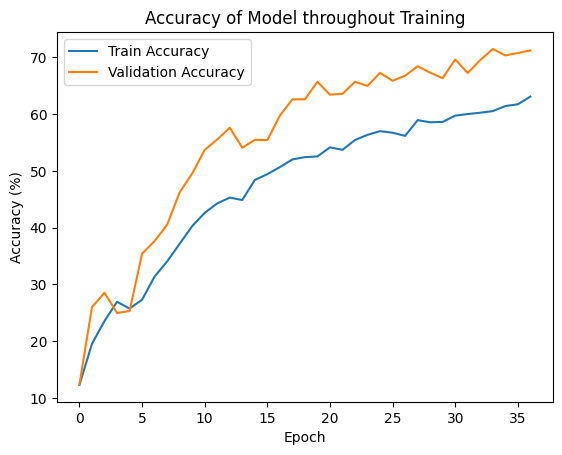

Average Epoch Accuracy: 0.6305840109832084
Epoch is 37


Accuracy is 0.67578125
Accuracy is 0.599609375
Accuracy is 0.6184895833333334
Accuracy is 0.6298828125
Accuracy is 0.63046875
Accuracy is 0.6276041666666666
Accuracy is 0.6244419642857143
Accuracy is 0.62353515625
Accuracy is 0.6197916666666666
Accuracy is 0.621484375
Accuracy is 0.6225142045454546
Accuracy is 0.6263020833333334
Accuracy is 0.6222956730769231
Accuracy is 0.6227678571428571
Accuracy is 0.6263020833333334
Accuracy is 0.62451171875
Accuracy is 0.6217830882352942
Accuracy is 0.6202256944444444
Accuracy is 0.619860197368421
Accuracy is 0.619921875
Accuracy is 0.6175595238095238
Accuracy is 0.6175426136363636
Accuracy is 0.6161684782608695
Accuracy is 0.6162109375
Accuracy is 0.61625
Accuracy is 0.6158353365384616
Accuracy is 0.6174768518518519
Accuracy is 0.6178850446428571
Accuracy is 0.6170528017241379
Accuracy is 0.6173177083333333
Accuracy is 0.6154233870967742
Accuracy is 0.61669921875
Accuracy is 0.6181344696969697
Accuracy is 0.6174172794117647
Accuracy is 0.61808035

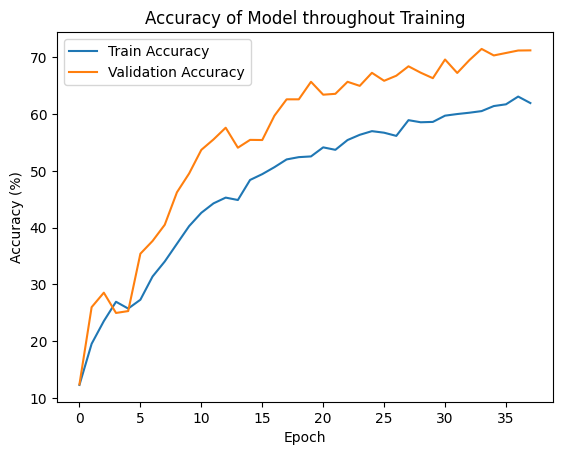

Average Epoch Accuracy: 0.6191783715281445
Epoch is 38


Accuracy is 0.58203125
Accuracy is 0.60546875
Accuracy is 0.6080729166666666
Accuracy is 0.619140625
Accuracy is 0.63046875
Accuracy is 0.630859375
Accuracy is 0.6261160714285714
Accuracy is 0.62255859375
Accuracy is 0.6197916666666666
Accuracy is 0.621484375
Accuracy is 0.6189630681818182
Accuracy is 0.6175130208333334
Accuracy is 0.6195913461538461
Accuracy is 0.6185825892857143
Accuracy is 0.6200520833333333
Accuracy is 0.617431640625
Accuracy is 0.6185661764705882
Accuracy is 0.6195746527777778
Accuracy is 0.6202713815789473
Accuracy is 0.61953125
Accuracy is 0.6194196428571429
Accuracy is 0.6212713068181818
Accuracy is 0.6187160326086957
Accuracy is 0.6183268229166666
Accuracy is 0.61765625
Accuracy is 0.619140625
Accuracy is 0.6179108796296297
Accuracy is 0.6164899553571429
Accuracy is 0.6155711206896551
Accuracy is 0.6173177083333333
Accuracy is 0.6180695564516129
Accuracy is 0.6182861328125
Accuracy is 0.6183712121212122
Accuracy is 0.6179917279411765
Accuracy is 0.618303571428

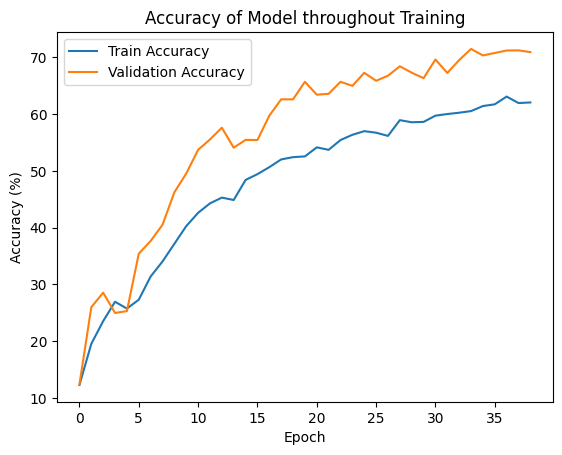

Average Epoch Accuracy: 0.6202344492554652
Epoch is 39


Accuracy is 0.640625
Accuracy is 0.623046875
Accuracy is 0.6197916666666666
Accuracy is 0.619140625
Accuracy is 0.64140625
Accuracy is 0.6419270833333334
Accuracy is 0.6339285714285714
Accuracy is 0.6328125
Accuracy is 0.6263020833333334
Accuracy is 0.626171875
Accuracy is 0.6239346590909091
Accuracy is 0.6253255208333334
Accuracy is 0.6240985576923077
Accuracy is 0.6216517857142857
Accuracy is 0.6208333333333333
Accuracy is 0.62158203125
Accuracy is 0.6229319852941176
Accuracy is 0.6228298611111112
Accuracy is 0.6227384868421053
Accuracy is 0.6216796875
Accuracy is 0.6231398809523809
Accuracy is 0.6241122159090909
Accuracy is 0.6260190217391305
Accuracy is 0.6277669270833334
Accuracy is 0.62765625
Accuracy is 0.6263521634615384
Accuracy is 0.6263020833333334
Accuracy is 0.6259765625
Accuracy is 0.627020474137931
Accuracy is 0.6279947916666667
Accuracy is 0.627898185483871
Accuracy is 0.629638671875
Accuracy is 0.6294981060606061
Accuracy is 0.6294806985294118
Accuracy is 0.62890625
Ac

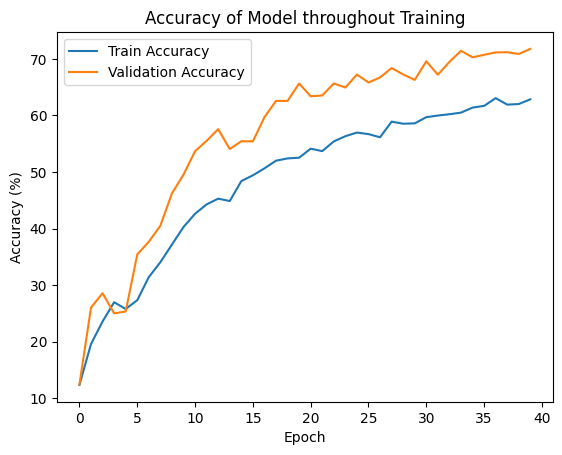

Average Epoch Accuracy: 0.6285774633012989
Epoch is 40


Accuracy is 0.640625
Accuracy is 0.66015625
Accuracy is 0.6588541666666666
Accuracy is 0.6474609375
Accuracy is 0.64140625
Accuracy is 0.6399739583333334
Accuracy is 0.6389508928571429
Accuracy is 0.6416015625
Accuracy is 0.6397569444444444
Accuracy is 0.640234375
Accuracy is 0.6409801136363636
Accuracy is 0.6396484375
Accuracy is 0.6394230769230769
Accuracy is 0.6403459821428571
Accuracy is 0.63984375
Accuracy is 0.639404296875
Accuracy is 0.6371783088235294
Accuracy is 0.634765625
Accuracy is 0.6346628289473685
Accuracy is 0.634765625
Accuracy is 0.63671875
Accuracy is 0.6356534090909091
Accuracy is 0.6362092391304348
Accuracy is 0.6359049479166666
Accuracy is 0.63625
Accuracy is 0.6365685096153846
Accuracy is 0.6368634259259259
Accuracy is 0.6383928571428571
Accuracy is 0.6400862068965517
Accuracy is 0.6412760416666666
Accuracy is 0.6397429435483871
Accuracy is 0.6405029296875
Accuracy is 0.638967803030303
Accuracy is 0.638671875
Accuracy is 0.6377232142857143
Accuracy is 0.63910590

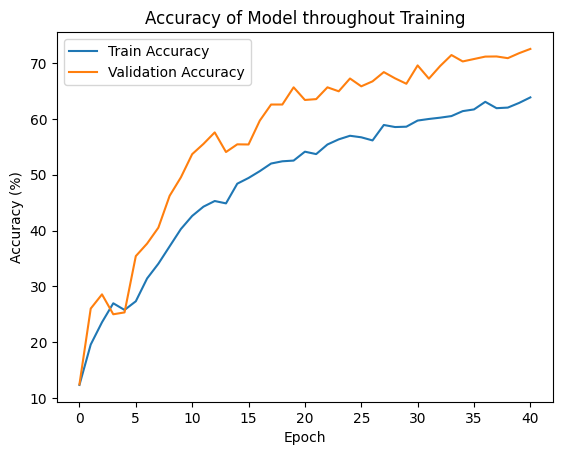

Average Epoch Accuracy: 0.6385045939381139
Epoch is 41


Accuracy is 0.671875
Accuracy is 0.642578125
Accuracy is 0.62890625
Accuracy is 0.6435546875
Accuracy is 0.6421875
Accuracy is 0.6412760416666666
Accuracy is 0.6333705357142857
Accuracy is 0.6318359375
Accuracy is 0.62890625
Accuracy is 0.626171875
Accuracy is 0.6264204545454546
Accuracy is 0.6246744791666666
Accuracy is 0.6295072115384616
Accuracy is 0.6344866071428571
Accuracy is 0.6359375
Accuracy is 0.6357421875
Accuracy is 0.6351102941176471
Accuracy is 0.6354166666666666
Accuracy is 0.6352796052631579
Accuracy is 0.634765625
Accuracy is 0.6339285714285714
Accuracy is 0.6344105113636364
Accuracy is 0.6343410326086957
Accuracy is 0.6321614583333334
Accuracy is 0.63296875
Accuracy is 0.6322115384615384
Accuracy is 0.6331018518518519
Accuracy is 0.634765625
Accuracy is 0.6352370689655172
Accuracy is 0.6330729166666667
Accuracy is 0.6333165322580645
Accuracy is 0.632568359375
Accuracy is 0.6341145833333334
Accuracy is 0.6337316176470589
Accuracy is 0.6328125
Accuracy is 0.633463541666

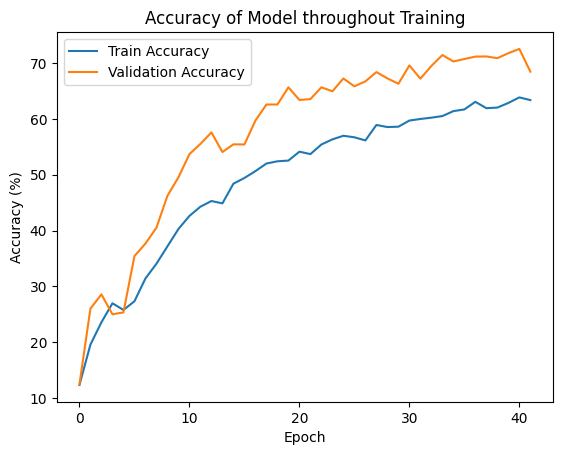

Average Epoch Accuracy: 0.6336466363924385
Epoch is 42


Accuracy is 0.6171875
Accuracy is 0.642578125
Accuracy is 0.6302083333333334
Accuracy is 0.6318359375
Accuracy is 0.63828125
Accuracy is 0.6399739583333334
Accuracy is 0.6372767857142857
Accuracy is 0.64013671875
Accuracy is 0.6388888888888888
Accuracy is 0.64375
Accuracy is 0.6416903409090909
Accuracy is 0.6409505208333334
Accuracy is 0.6376201923076923
Accuracy is 0.6381138392857143
Accuracy is 0.6393229166666666
Accuracy is 0.637939453125
Accuracy is 0.63671875
Accuracy is 0.6393229166666666
Accuracy is 0.6389802631578947
Accuracy is 0.6400390625
Accuracy is 0.6372767857142857
Accuracy is 0.6379616477272727
Accuracy is 0.6362092391304348
Accuracy is 0.63720703125
Accuracy is 0.63765625
Accuracy is 0.6368689903846154
Accuracy is 0.6387442129629629
Accuracy is 0.6388113839285714
Accuracy is 0.6382004310344828
Accuracy is 0.6373697916666666
Accuracy is 0.6369707661290323
Accuracy is 0.63916015625
Accuracy is 0.6387310606060606
Accuracy is 0.6407398897058824
Accuracy is 0.63973214285714

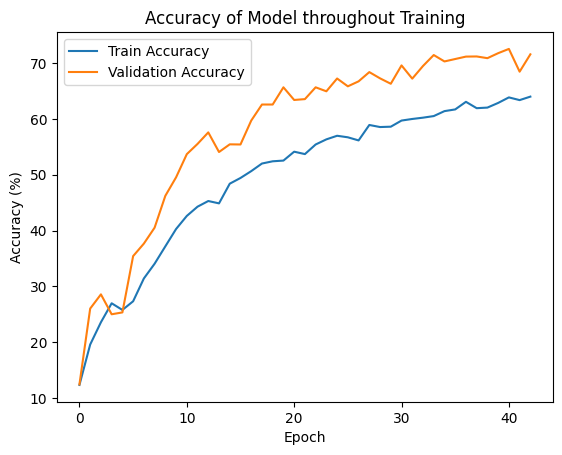

Average Epoch Accuracy: 0.6398774949836308
Epoch is 43


Accuracy is 0.65625
Accuracy is 0.66796875
Accuracy is 0.6705729166666666
Accuracy is 0.673828125
Accuracy is 0.66796875
Accuracy is 0.6731770833333334
Accuracy is 0.6668526785714286
Accuracy is 0.6630859375
Accuracy is 0.6575520833333334
Accuracy is 0.65703125
Accuracy is 0.65625
Accuracy is 0.6507161458333334
Accuracy is 0.6520432692307693
Accuracy is 0.6512276785714286
Accuracy is 0.6518229166666667
Accuracy is 0.649658203125
Accuracy is 0.6495863970588235
Accuracy is 0.6484375
Accuracy is 0.6492598684210527
Accuracy is 0.6515625
Accuracy is 0.6502976190476191
Accuracy is 0.6493252840909091
Accuracy is 0.6514945652173914
Accuracy is 0.6534830729166666
Accuracy is 0.6525
Accuracy is 0.6508413461538461
Accuracy is 0.6517650462962963
Accuracy is 0.6492745535714286
Accuracy is 0.6499191810344828
Accuracy is 0.6498697916666667
Accuracy is 0.6507056451612904
Accuracy is 0.6497802734375
Accuracy is 0.6496212121212122
Accuracy is 0.6501608455882353
Accuracy is 0.6495535714285714
Accuracy is

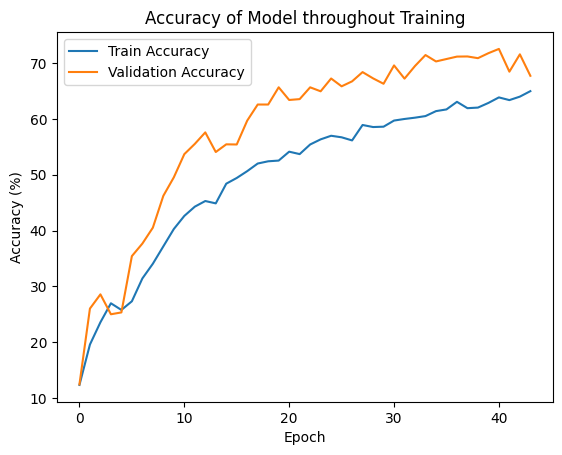

Average Epoch Accuracy: 0.6496990178477136
Epoch is 44


Accuracy is 0.671875
Accuracy is 0.654296875
Accuracy is 0.6627604166666666
Accuracy is 0.6591796875
Accuracy is 0.65
Accuracy is 0.6516927083333334
Accuracy is 0.6439732142857143
Accuracy is 0.6533203125
Accuracy is 0.6553819444444444
Accuracy is 0.65078125
Accuracy is 0.6534090909090909
Accuracy is 0.6481119791666666
Accuracy is 0.6388221153846154
Accuracy is 0.638671875
Accuracy is 0.6369791666666667
Accuracy is 0.640380859375
Accuracy is 0.6408547794117647
Accuracy is 0.6375868055555556
Accuracy is 0.637952302631579
Accuracy is 0.6400390625
Accuracy is 0.6395089285714286
Accuracy is 0.6408025568181818
Accuracy is 0.6390964673913043
Accuracy is 0.6360677083333334
Accuracy is 0.636875
Accuracy is 0.6370192307692307
Accuracy is 0.6368634259259259
Accuracy is 0.6375558035714286
Accuracy is 0.6375269396551724
Accuracy is 0.6395833333333333
Accuracy is 0.6402469758064516
Accuracy is 0.6392822265625
Accuracy is 0.6392045454545454
Accuracy is 0.6397058823529411
Accuracy is 0.63694196428571

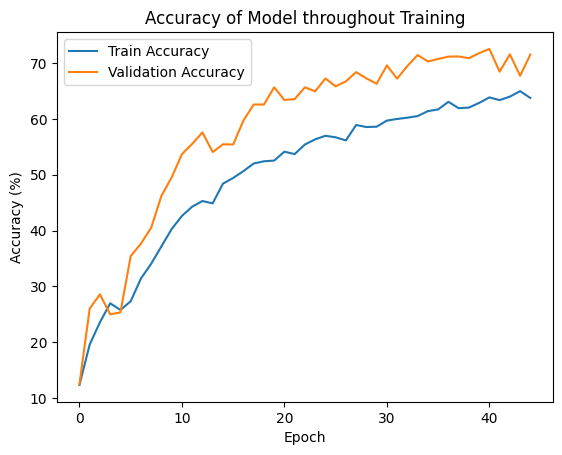

Average Epoch Accuracy: 0.6374485162107931
Epoch is 45


Accuracy is 0.625
Accuracy is 0.66015625
Accuracy is 0.6575520833333334
Accuracy is 0.65234375
Accuracy is 0.65625
Accuracy is 0.6536458333333334
Accuracy is 0.6467633928571429
Accuracy is 0.64501953125
Accuracy is 0.64453125
Accuracy is 0.64296875
Accuracy is 0.6495028409090909
Accuracy is 0.6494140625
Accuracy is 0.6451322115384616
Accuracy is 0.6467633928571429
Accuracy is 0.6481770833333333
Accuracy is 0.6474609375
Accuracy is 0.6488970588235294
Accuracy is 0.6460503472222222
Accuracy is 0.6467927631578947
Accuracy is 0.6470703125
Accuracy is 0.6484375
Accuracy is 0.6498579545454546
Accuracy is 0.6477581521739131
Accuracy is 0.6468098958333334
Accuracy is 0.6490625
Accuracy is 0.6491887019230769
Accuracy is 0.6500289351851852
Accuracy is 0.6509486607142857
Accuracy is 0.6516702586206896
Accuracy is 0.65078125
Accuracy is 0.65234375
Accuracy is 0.65185546875
Accuracy is 0.6512784090909091
Accuracy is 0.6506204044117647
Accuracy is 0.6506696428571429
Accuracy is 0.6508246527777778
Ac

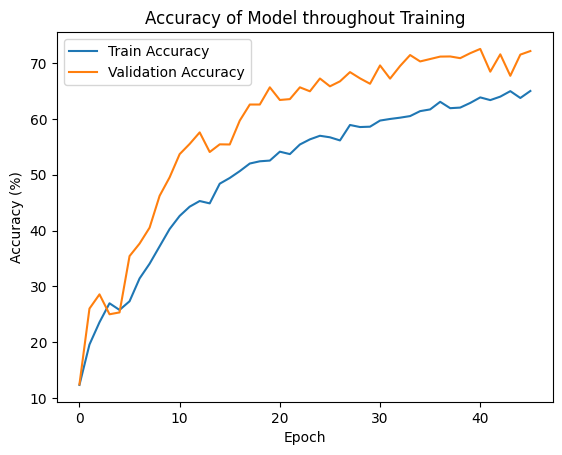

Average Epoch Accuracy: 0.6500158411659098
Epoch is 46


Accuracy is 0.63671875
Accuracy is 0.63671875
Accuracy is 0.6380208333333334
Accuracy is 0.638671875
Accuracy is 0.64453125
Accuracy is 0.6432291666666666
Accuracy is 0.6422991071428571
Accuracy is 0.63623046875
Accuracy is 0.640625
Accuracy is 0.644921875
Accuracy is 0.6420454545454546
Accuracy is 0.6419270833333334
Accuracy is 0.6421274038461539
Accuracy is 0.6420200892857143
Accuracy is 0.6450520833333333
Accuracy is 0.6435546875
Accuracy is 0.6461397058823529
Accuracy is 0.6443142361111112
Accuracy is 0.6428865131578947
Accuracy is 0.6421875
Accuracy is 0.6432291666666666
Accuracy is 0.6441761363636364
Accuracy is 0.6436820652173914
Accuracy is 0.6432291666666666
Accuracy is 0.64359375
Accuracy is 0.6452824519230769
Accuracy is 0.6459780092592593
Accuracy is 0.6471819196428571
Accuracy is 0.6481681034482759
Accuracy is 0.64921875
Accuracy is 0.6507056451612904
Accuracy is 0.6502685546875
Accuracy is 0.6504498106060606
Accuracy is 0.6519990808823529
Accuracy is 0.6520089285714286
Ac

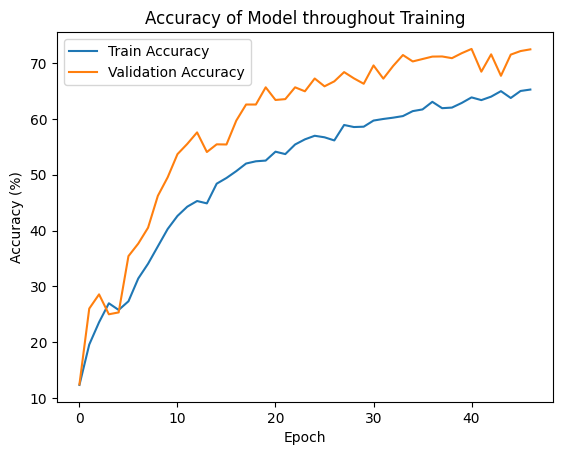

Average Epoch Accuracy: 0.6525504277114795
Epoch is 47


Accuracy is 0.69140625
Accuracy is 0.671875
Accuracy is 0.6627604166666666
Accuracy is 0.65234375
Accuracy is 0.6453125
Accuracy is 0.6458333333333334
Accuracy is 0.6383928571428571
Accuracy is 0.64306640625
Accuracy is 0.6432291666666666
Accuracy is 0.638671875
Accuracy is 0.6317471590909091
Accuracy is 0.634765625
Accuracy is 0.6361177884615384
Accuracy is 0.6372767857142857
Accuracy is 0.63984375
Accuracy is 0.6396484375
Accuracy is 0.6424632352941176
Accuracy is 0.6423611111111112
Accuracy is 0.6426809210526315
Accuracy is 0.644140625
Accuracy is 0.6460193452380952
Accuracy is 0.6470170454545454
Accuracy is 0.6501358695652174
Accuracy is 0.6510416666666666
Accuracy is 0.65203125
Accuracy is 0.6509915865384616
Accuracy is 0.6495949074074074
Accuracy is 0.6491350446428571
Accuracy is 0.650323275862069
Accuracy is 0.6510416666666666
Accuracy is 0.6500756048387096
Accuracy is 0.6495361328125
Accuracy is 0.6509232954545454
Accuracy is 0.6508501838235294
Accuracy is 0.65078125
Accuracy i

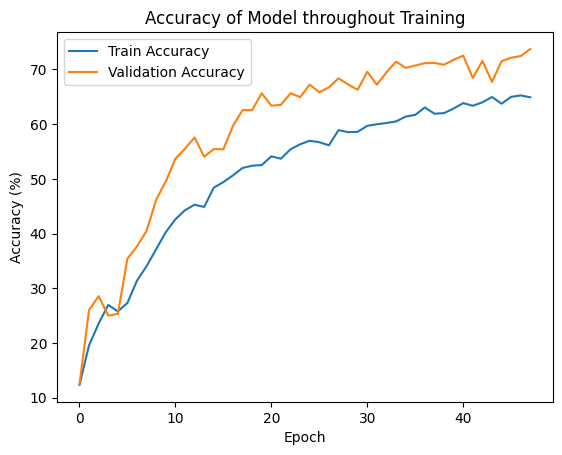

Average Epoch Accuracy: 0.6491709789840532
Epoch is 48


Accuracy is 0.671875
Accuracy is 0.654296875
Accuracy is 0.640625
Accuracy is 0.6494140625
Accuracy is 0.64375
Accuracy is 0.650390625
Accuracy is 0.6495535714285714
Accuracy is 0.64599609375
Accuracy is 0.64453125
Accuracy is 0.647265625
Accuracy is 0.6484375
Accuracy is 0.6513671875
Accuracy is 0.65234375
Accuracy is 0.6531808035714286
Accuracy is 0.653125
Accuracy is 0.651611328125
Accuracy is 0.6532628676470589
Accuracy is 0.6538628472222222
Accuracy is 0.6504934210526315
Accuracy is 0.6498046875
Accuracy is 0.6506696428571429
Accuracy is 0.6489701704545454
Accuracy is 0.6487771739130435
Accuracy is 0.6490885416666666
Accuracy is 0.64828125
Accuracy is 0.6493389423076923
Accuracy is 0.6498842592592593
Accuracy is 0.6484375
Accuracy is 0.6478987068965517
Accuracy is 0.6467447916666667
Accuracy is 0.6460433467741935
Accuracy is 0.6451416015625
Accuracy is 0.646188446969697
Accuracy is 0.6452205882352942
Accuracy is 0.6447544642857143
Accuracy is 0.6462673611111112
Accuracy is 0.64600

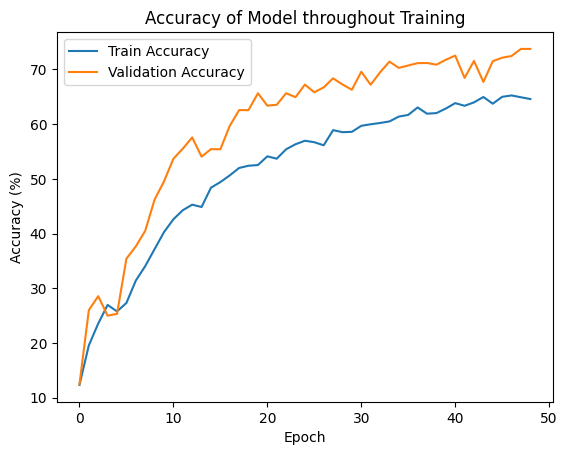

Average Epoch Accuracy: 0.646002745802091
Epoch is 49


Accuracy is 0.63671875
Accuracy is 0.685546875
Accuracy is 0.6705729166666666
Accuracy is 0.6640625
Accuracy is 0.66328125
Accuracy is 0.6673177083333334
Accuracy is 0.6690848214285714
Accuracy is 0.6787109375
Accuracy is 0.6762152777777778
Accuracy is 0.67578125
Accuracy is 0.6736505681818182
Accuracy is 0.6754557291666666
Accuracy is 0.6769831730769231
Accuracy is 0.6774553571428571
Accuracy is 0.6760416666666667
Accuracy is 0.673828125
Accuracy is 0.67578125
Accuracy is 0.6744791666666666
Accuracy is 0.6735197368421053
Accuracy is 0.6716796875
Accuracy is 0.6711309523809523
Accuracy is 0.669921875
Accuracy is 0.66796875
Accuracy is 0.6687825520833334
Accuracy is 0.67015625
Accuracy is 0.6685697115384616
Accuracy is 0.6673900462962963
Accuracy is 0.6678292410714286
Accuracy is 0.6646012931034483
Accuracy is 0.6635416666666667
Accuracy is 0.6635584677419355
Accuracy is 0.6644287109375
Accuracy is 0.6641808712121212
Accuracy is 0.6641773897058824
Accuracy is 0.6628348214285714
Accuracy

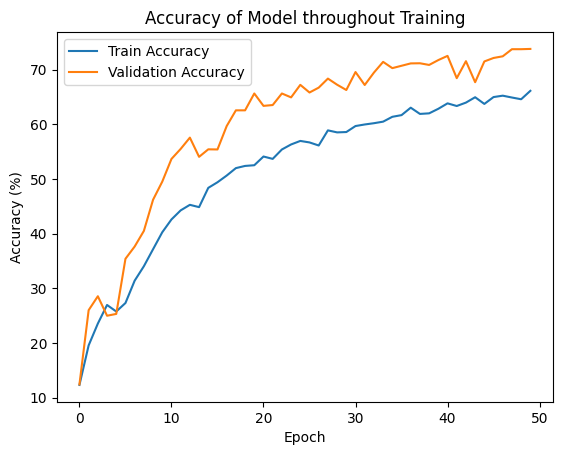

Finished Training


In [ ]:
from prompt_toolkit import output
# Training loop
from fastprogress import master_bar, progress_bar
import seaborn as sns

print("Start epoch is " + str(start_epoch))

model.train()



for epoch in range(start_epoch, 50):  # loop over the dataset multiple times
    try:
    #     average_accuracy = sum(top_1_accuracies) / len(top_1_accuracies)
        print("Average Epoch Accuracy: " + str(pct_correct))
    except:
        print("Let us begin")


    top_1_accuracies = []
    total = 0
    num_correct = 0
    print("Epoch is " + str(epoch))
    running_loss = 0.0
    for i, data in enumerate(progress_bar(train_dataloader), 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #classification accuracy
        num_correct += compute_accuracy(outputs, labels)
        total += inputs.shape[0]
        top_1 = compute_accuracy(outputs, labels)
        top_1_accuracies.append(top_1)
        print("Accuracy is " + str(num_correct/total))
    pct_correct = num_correct/total
    #print("Accuracy is " + str(pct_correct))

    #classification accuracy
    display_progress(epoch, model, val_dataloader, pct_correct)
    #, train_dataloader

    # save checkpoint
    torch.save(dict(
      epoch=epoch+1,
      state_dict=model.state_dict(),
      optimizer_dict=optimizer.state_dict(),
      top_1 = top_1,
      logs=logs
    ), checkpoint_name)



    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:  # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0



print('Finished Training')


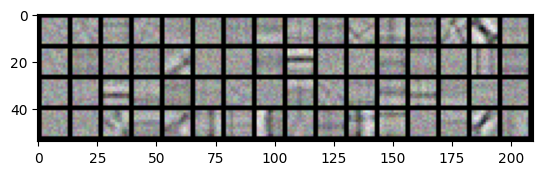

In [ ]:
import torch.nn as nn
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
# Display convolutional kernels of each model
def show_conv1(model, nrow=16):
    # find first conv
    first_conv = None
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            first_conv = m
            break
    if first_conv is not None:
        kernels = first_conv.weight.detach().clone().cpu()
        kernels = kernels - kernels.min()
        kernels = kernels / kernels.max()
        img = make_grid(kernels, nrow=nrow)
        plt.imshow(img.permute(1, 2, 0))
    else:
        print("failed to find first conv layer")

show_conv1(model)

In [ ]:
display_progress(21, model, val_dataloader, train_dataloader)
display_progress(22, model, val_dataloader, train_dataloader)
display_progress(23, model, val_dataloader, train_dataloader)

Testing model


KeyboardInterrupt: ignored

To UPDATE


In [ ]:
# model_name = "model_weights_orig_imagenette.pth.tar"
# checkpoint_name = os.path.join(output_dir, model_name)

# # if checkpoint exists, resume from checkpoint
# if os.path.isfile(checkpoint_name):
#   pass

# # save checkpoint
#   torch.save(dict(
#     epoch=epoch+1,
#     state_dict=model.state_dict(),
#     optimizer_dict=optimizer.state_dict(),
#     logs=logs
#   ), checkpoint_name)